# prepare

In [97]:
import graphviz as gz
import pandas   as pd
import numpy    as np
import cvxpy    as cp
import matplotlib.pyplot as plt
import statsmodels.api  as stm
import statsmodels.tsa.api as smt
import scipy.stats as scs
import seaborn as sns
import sklearn.decomposition as sdc
from scipy import linalg
from collections import namedtuple
from talib import abstract as ab
plt.rcParams['font.sans-serif'] = ['KaiTi'] # ÊåáÂÆöÈªòËÆ§Â≠ó‰Ωì
plt.rcParams['axes.unicode_minus'] = False # Ëß£ÂÜ≥‰øùÂ≠òÂõæÂÉèÊòØË¥üÂè∑'-'ÊòæÁ§∫‰∏∫ÊñπÂùóÁöÑÈóÆÈ¢ò

## graphviz

1. ÂÆâË£ÖgraphvizÁöÑÂÆâË£ÖÊñá‰ª∂Ôºà‰ªéÂÆòÁΩë‰∏ãËΩΩÔºâ
2. Â∞ÜÂÆâË£ÖÁ®ãÂ∫èÁöÑbinÁõÆÂΩïÂä†ÂÖ•Âà∞pathÁöÑÁéØÂ¢ÉÂèòÈáèÈáåÈù¢ÔºàwindowÔºâ
3. pip install graphvize

# MFMÂü∫Êú¨ÁêÜËÆ∫
Â§öÂõ†Â≠êÊ®°Âûã:Multiple-Factor Model, ÁÆÄÁß∞ÔºöMFM

## ‰∏ªÂä®ÂÆöÈáèÁªÑÂêàÁÆ°ÁêÜ

### ÊãìÊâë

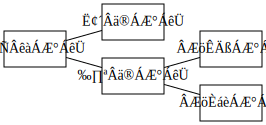

In [2]:
g=gz.Graph()
g.attr(rankdir='LR')
g.attr('node', shape='box')
g.node('AA','ÁªÑÂêàÁÆ°ÁêÜ')
g.node('BA','Ë¢´Âä®ÁÆ°ÁêÜ')
g.node('BB','‰∏ªÂä®ÁÆ°ÁêÜ')
g.node('CA','ÂÆöÊÄßÁÆ°ÁêÜ')
g.node('CB','ÂÆöÈáèÁÆ°ÁêÜ')

g.edges([('AA','BA'),('AA','BB'),('BB','CA'),('BB','CB'),])
g

### ÂØπÊØî

|ÂØπÊØî|ÂáÜÂàô |ÂÆöÈáèÁÆ°ÁêÜ |ÂÆöÊÄßÁÆ°ÁêÜ|
|-|-|-|-|
|‰ºòÂäø| ÂÆ¢ËßÇÊÄß| È´ò| ‰Ωé
|‰ºòÂäø|ÂÆΩÂ∫¶| È´ò| ‰Ωé|
|‰ºòÂäø|Ë°å‰∏∫Â§±ËØØ| ‰Ωé| È´ò|
|‰ºòÂäø|ÂèØÂ§çÂà∂ÊÄß| È´ò| ‰Ωé|
|‰ºòÂäø|ÊàêÊú¨| ‰Ωé| È´ò|
|‰ºòÂäø|È£éÈô©ÊéßÂà∂| È´ò| ‰Ωé|
|Âä£Âäø| ÂÆöÊÄßÊäïÂÖ•| ‰Ωé| È´ò
|Âä£Âäø|ÂéÜÂè≤Êï∞ÊçÆ‰æùËµñÊÄß| È´ò| ‰Ωé|
|Âä£Âäø|Êï∞ÊçÆÊåñÊéò| È´ò| ‰Ωé|
|Âä£Âäø|ÂèçÂ∫îÊÄß| ‰Ωé| È´ò|

### ÂÆöÈáèÁÆ°ÁêÜÁöÑ‰∏ÉÊù°ÂáÜÂàôÔºö

ÂÆöÈáèÁÆ°ÁêÜÁöÑÂÖ≥Ê≥®ÁÇπÊòØÂõ†Â≠êÔºàÂÖ±ÊÄßÔºâÔºåËÄåÈùûËÇ°Á•®Ôºà‰∏™ÊÄßÔºâ„ÄÇ

1. Â∏ÇÂú∫Â§ßÂ§öÊòØÊúâÊïàÁöÑÔºõ
2. Á∫ØÂ•óÂà©Êú∫‰ºö‰∏çÂ≠òÂú®Ôºõ
3. ÂÆöÈáèÂàÜÊûêÂàõÈÄ†ÁªüËÆ°‰∏äÁöÑÂ•óÂà©Êú∫‰ºöÔºõ
4. ÂÆöÈáèÂàÜÊûê‰ª•ÊúâÊïàÁöÑÊñπÂºèÁªìÂêàÊâÄÊúâÂèØËé∑ÂæóÁöÑ‰ø°ÊÅØÔºõ
5. ÂÆöÈáèÊ®°ÂûãÂ∫îËØ•Âü∫‰∫éÂêàÁêÜÁöÑÁªèÊµéÁêÜËÆ∫Ôºõ
6. ÂÆöÈáèÊ®°ÂûãÂ∫îËØ•ÂèçÊò†ÊåÅÁª≠ÂíåÁ®≥ÂÆöÁöÑÊ®°ÂºèÔºõ
7. ËØÅÂà∏ÊäïËµÑÁªÑÂêà‰∏éÂü∫ÂáÜÁöÑÂÅèÂ∑ÆÂè™ÊúâÂΩì‰∏çÁ°ÆÂÆöÊÄßË∂≥Â§üÂ∞èÊó∂ÊâçÊòØÂêàÁêÜÁöÑ„ÄÇ

### MFMÊ®°Âûã

$\Large\tilde{r_j}=\sum_{k=1}^K{\underbrace{X_{jk}\tilde{f_k}}_{ÂÆöÈáèÁÆ°ÁêÜ}+\underbrace{\tilde{\mu}}_{ÂÆöÊÄßÁÆ°ÁêÜ}}$

## $\alpha$ÔºöÈòøÂ∞îÊ≥ï
$\alpha$:Ë∂ÖË∂äÂπ≥ÂùáÊ∞¥Âπ≥ÊàñËÄÖÂü∫ÂáÜÁöÑÂçìË∂äË°®Áé∞

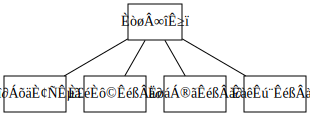

In [3]:
g=gz.Graph()
g.attr(rankdir='TB')
g.attr('node', shape='box')
g.node('AA','ÈòøÂ∞îÊ≥ï')
g.node('BA','Êî∂ÁõäÈ¢ÑÊµã')
g.node('BB','È£éÈô©ÊéßÂà∂')
g.node('BC','ËøáÁ®ãÊéßÂà∂')
g.node('BD','ÊàêÊú¨ÊéßÂà∂')

g.edges([('AA','BA'),('AA','BB'),('AA','BC'),('AA','BD'),])
g

## MFM

### ÂàÜÁ±ª

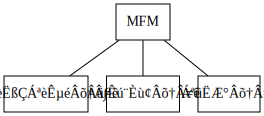

In [4]:
g=gz.Graph()
g.attr(rankdir='TB')
g.attr('node', shape='box')
g.node('AA','MFM')
g.node('BA','ÂÆèËßÇÁªèÊµéÂõ†Â≠ê')
g.node('BB','Âü∫Êú¨Èù¢Âõ†Â≠ê')
g.node('BC','ÁªüËÆ°Âõ†Â≠ê')

g.edges([('AA','BA'),('AA','BB'),('AA','BC'),])
g

### Â§öÂõ†Â≠êÊ®°ÂûãÁöÑÈ£éÈô©ÂàÜËß£

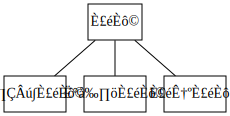

In [5]:
g=gz.Graph()
g.attr(rankdir='TB')
g.attr('node', shape='box')
g.node('AA','È£éÈô©')
g.node('BA','Â∏ÇÂú∫È£éÈô©')
g.node('BB','Ë°å‰∏öÈ£éÈô©')
g.node('BC','È£éÊ†ºÈ£éÈô©')
g.edges([('AA','BA'),('AA','BB'),('AA','BC'),])
g

È£éÊ†ºÂõ†Â≠êÔºö
1. ‰º∞ÂÄºÂõ†Â≠ê
2. ÊàêÈïøÂõ†Â≠ê
3. Ë¥¢Âä°Ë¥®ÈáèÂõ†Â≠ê
4. Êù†ÊùÜÂõ†Â≠ê
5. ËßÑÊ®°Âõ†Â≠ê
6. Âä®ÈáèÂõ†Â≠ê
7. Ê≥¢Âä®ÁéáÂõ†Â≠ê
8. Êç¢ÊâãÁéáÂõ†Â≠ê
9. ÊîπËøõÁöÑÂä®ÈáèÂõ†Â≠ê
10. ÂàÜÊûêÂ∏àÊÉÖÁª™Âõ†Â≠ê
11. ËÇ°‰∏úÂõ†Â≠ê
12. ÊäÄÊúØÂõ†Â≠ê

# ÊûÑÂª∫ÊµÅÁ®ãÂÆûË∑µ

## ÊµÅÁ®ãÂõæ

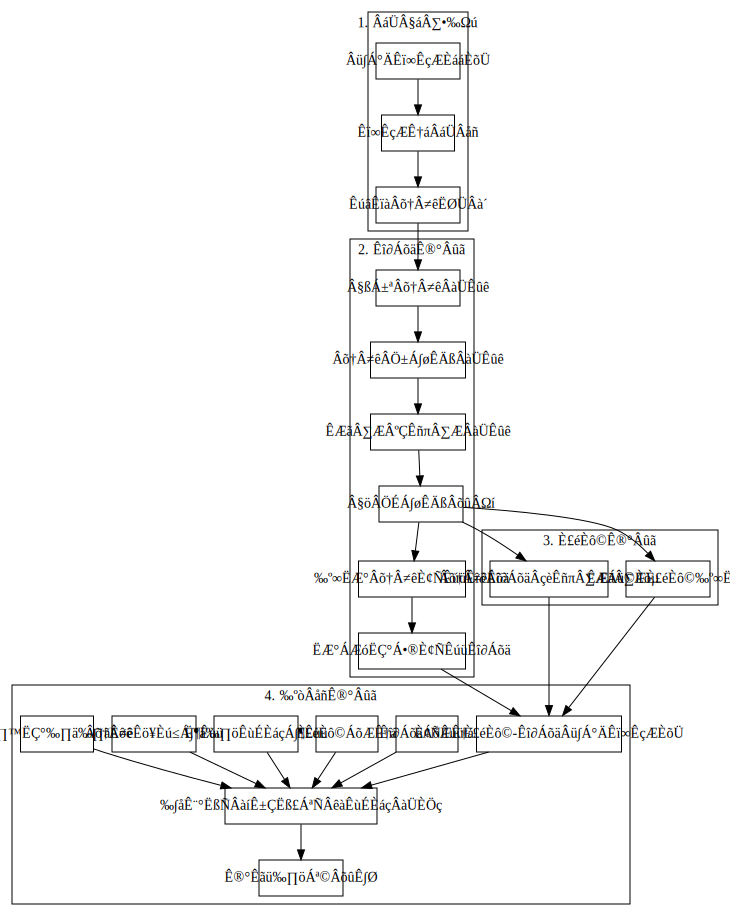

In [6]:
g=gz.Digraph()
g.attr('node', shape='box')
g.attr(rankdir='TB', )
with g.subgraph(name='cluster_0',) as c:
    c.edges([
        ('Âü∫Á°ÄÊï∞ÊçÆÈááÈõÜ','Êï∞ÊçÆÊ†áÂáÜÂåñ'),
        ('Êï∞ÊçÆÊ†áÂáÜÂåñ','ÊúâÊïàÂõ†Â≠êËØÜÂà´'),
    ])
    c.attr(label='1. ÂáÜÂ§áÂ∑•‰Ωú')
with g.subgraph(name='cluster_1') as c:
    c.edges([
        ('Â§ßÁ±ªÂõ†Â≠êÂàÜÊûê','Âõ†Â≠êÂÖ±Á∫øÊÄßÂàÜÊûê'),
        ('Âõ†Â≠êÂÖ±Á∫øÊÄßÂàÜÊûê','ÊÆãÂ∑ÆÂºÇÊñπÂ∑ÆÂàÜÊûê'),
        ('ÊÆãÂ∑ÆÂºÇÊñπÂ∑ÆÂàÜÊûê','Â§öÂÖÉÁ∫øÊÄßÂõûÂΩí'),
        ('Â§öÂÖÉÁ∫øÊÄßÂõûÂΩí','‰º∞ËÆ°Âõ†Â≠êÈ¢ÑÊúüÊî∂Áõä'),
        ('‰º∞ËÆ°Âõ†Â≠êÈ¢ÑÊúüÊî∂Áõä','ËÆ°ÁÆóËÇ°Á•®È¢ÑÊúüÊî∂Áõä'),
    ])
    c.attr(label='2. Êî∂ÁõäÊ®°Âûã')
with g.subgraph(name='cluster_2') as c:
    c.node('Âõ†Â≠êÊî∂ÁõäÂçèÊñπÂ∑ÆÁü©Èòµ')
    c.node('ÊÆãÂ∑ÆÈ£éÈô©‰º∞ËÆ°')
    c.attr(label='3. È£éÈô©Ê®°Âûã')
with g.subgraph(name='cluster_3') as c:
    c.edges([
        ('È¢ÑÊúüÈ£éÈô©-Êî∂ÁõäÂü∫Á°ÄÊï∞ÊçÆÈõÜ','‰∫åÊ¨°ËßÑÂàíÊ±ÇËß£ÁªÑÂêàÊùÉÈáçÂàÜÈÖç'),
        ('Êî∂ÁõäÁõÆÊ†á','‰∫åÊ¨°ËßÑÂàíÊ±ÇËß£ÁªÑÂêàÊùÉÈáçÂàÜÈÖç'),
        ('È£éÈô©ÁõÆÊ†á','‰∫åÊ¨°ËßÑÂàíÊ±ÇËß£ÁªÑÂêàÊùÉÈáçÂàÜÈÖç'),
        ('Ë°å‰∏öÊùÉÈáçÁ∫¶Êùü','‰∫åÊ¨°ËßÑÂàíÊ±ÇËß£ÁªÑÂêàÊùÉÈáçÂàÜÈÖç'),
        ('Âõ†Â≠êÊö¥Èú≤Á∫¶Êùü','‰∫åÊ¨°ËßÑÂàíÊ±ÇËß£ÁªÑÂêàÊùÉÈáçÂàÜÈÖç'),
        ('‰∏™ËÇ°‰∏ä‰∏ãÈôê','‰∫åÊ¨°ËßÑÂàíÊ±ÇËß£ÁªÑÂêàÊùÉÈáçÂàÜÈÖç'),
        ('‰∫åÊ¨°ËßÑÂàíÊ±ÇËß£ÁªÑÂêàÊùÉÈáçÂàÜÈÖç','Ê®°Êãü‰∏öÁª©ÂõûÊ∫Ø'),
    ])
    c.attr(label='4. ‰ºòÂåñÊ®°Âûã')
    
g.edges([
    ('ÊúâÊïàÂõ†Â≠êËØÜÂà´','Â§ßÁ±ªÂõ†Â≠êÂàÜÊûê'),
    ('Â§öÂÖÉÁ∫øÊÄßÂõûÂΩí','Âõ†Â≠êÊî∂ÁõäÂçèÊñπÂ∑ÆÁü©Èòµ'),
    ('Â§öÂÖÉÁ∫øÊÄßÂõûÂΩí','ÊÆãÂ∑ÆÈ£éÈô©‰º∞ËÆ°'),
    ('Âõ†Â≠êÊî∂ÁõäÂçèÊñπÂ∑ÆÁü©Èòµ','È¢ÑÊúüÈ£éÈô©-Êî∂ÁõäÂü∫Á°ÄÊï∞ÊçÆÈõÜ'),
    ('ÊÆãÂ∑ÆÈ£éÈô©‰º∞ËÆ°','È¢ÑÊúüÈ£éÈô©-Êî∂ÁõäÂü∫Á°ÄÊï∞ÊçÆÈõÜ'),
    ('ËÆ°ÁÆóËÇ°Á•®È¢ÑÊúüÊî∂Áõä','È¢ÑÊúüÈ£éÈô©-Êî∂ÁõäÂü∫Á°ÄÊï∞ÊçÆÈõÜ'),
])
g

## ÂáÜÂ§áÂ∑•‰Ωú

### Âü∫Á°ÄÊï∞ÊçÆÈááÈõÜ 

In [7]:
h5=pd.HDFStore('data/data.h5','r')

In [8]:
h5.keys()

['/fac',
 '/ind_close',
 '/ind_info',
 '/inx_close',
 '/obj_close',
 '/obj_cls',
 '/obj_weight']

In [9]:
# Ê≤™Ê∑±300ÊåáÊï∞Êî∂Áõò‰ª∑
h5['inx_close'].head()

instrument       date  s_dq_close
0  000300.SHA 2019-01-02   2969.5353
1  000300.SHA 2019-01-03   2964.8421
2  000300.SHA 2019-01-04   3035.8741
3  000300.SHA 2019-01-07   3054.3030
4  000300.SHA 2019-01-08   3047.7035

In [10]:
# Ë°å‰∏öÊåáÊï∞Êî∂Áõò‰ª∑
h5['ind_close'].head()

instrument       date  s_dq_close
0  801880.SI 2019-01-02     3364.27
1  801740.SI 2019-01-02      894.03
2  801210.SI 2019-01-02     4735.80
3  801200.SI 2019-01-02     2964.57
4  801750.SI 2019-01-02     3150.27

In [11]:
# Ë°å‰∏öÊåáÊï∞‰ø°ÊÅØÔºåÊåáÊï∞‰ª£Á†Å„ÄÅË°å‰∏ö‰ª£Á†Å„ÄÅË°å‰∏öÂêçÁß∞
h5['ind_info']

industriesalias industriesname    memo
356         801080.SI             ÁîµÂ≠ê  270000
968         801770.SI             ÈÄö‰ø°  730000
1067        801040.SI             Èí¢ÈìÅ  230000
1084        801180.SI            ÊàøÂú∞‰∫ß  430000
1661        801890.SI           Êú∫Ê¢∞ËÆæÂ§á  640000
2164        801720.SI           Âª∫Á≠ëË£ÖÈ•∞  620000
2833        801110.SI           ÂÆ∂Áî®ÁîµÂô®  330000
3360        801780.SI             Èì∂Ë°å  480000
4289        801010.SI           ÂÜúÊûóÁâßÊ∏î  110000
4573        801200.SI           ÂïÜ‰∏öË¥∏Êòì  450000
4638        801210.SI           ‰ºëÈó≤ÊúçÂä°  460000
4816        801880.SI             Ê±ΩËΩ¶  280000
4904        801750.SI            ËÆ°ÁÆóÊú∫  710000
4997        801140.SI           ËΩªÂ∑•Âà∂ÈÄ†  360000
5245        801160.SI           ÂÖ¨Áî®‰∫ã‰∏ö  410000
5574        801170.SI           ‰∫§ÈÄöËøêËæì  420000
7283        801130.SI           Á∫∫ÁªáÊúçË£Ö  350000
7633        801760.SI             ‰º†Â™í  720000
8073        801230.SI             ÁªºÂêà  510000
8176        801050.SI           ÊúâËâ≤ÈáëÂ±û  240000
9415        801020.SI             ÈááÊéò  210000
9614        801740.SI           ÂõΩÈò≤ÂÜõÂ∑•  650000
9676        801150.SI           ÂåªËçØÁîüÁâ©  370000
9988        801030.SI             ÂåñÂ∑•  220000
10156       801120.SI           È£üÂìÅÈ•ÆÊñô  340000
10389       801730.SI           ÁîµÊ∞îËÆæÂ§á  630000
10725       801790.SI           ÈùûÈì∂ÈáëËûç  490000
10862       801710.SI           Âª∫Á≠ëÊùêÊñô  610000

In [12]:
# ËÇ°Á•®ÁöÑ‰ª∑Ê†º‰ø°ÊÅØ
h5['obj_close'].head()

instrument       date  s_dq_adjclose
0  600518.SHA 2019-01-02         372.15
1  600549.SHA 2019-01-02         153.67
2  600570.SHA 2019-01-02         724.17
3  600023.SHA 2019-01-02           7.23
4  000786.SZA 2019-01-02         142.95

In [13]:
# ËÇ°Á•®ÊâÄÂ±ûË°å‰∏ö‰ø°ÊÅØ
h5['obj_cls'].head()

date  instrument industry_sw_level1
0 2019-03-04  600415.SHA             450000
1 2019-03-04  600299.SHA             220000
2 2019-03-04  600309.SHA             220000
3 2019-03-04  600660.SHA             280000
4 2019-03-04  600177.SHA             430000

In [14]:
# Ê≤™Ê∑±300ÊåáÊï∞ÊàêÂàÜËÇ°ÁöÑÊùÉÈáç‰ø°ÊÅØ
h5['obj_weight'].head()

date  instrument    weight
401 2019-01-02  002241.SZA  0.001426
402 2019-01-02  002230.SZA  0.003842
403 2019-01-02  002179.SZA  0.001418
404 2019-01-02  002153.SZA  0.000884
405 2019-01-02  002146.SZA  0.001472

### Êï∞ÊçÆÊ†áÂáÜÂåñÂ§ÑÁêÜ
Áî±‰∫éÂêÑ‰∏™Âõ†Â≠êÁöÑÈáèÁ∫≤‰∏ç‰∏ÄËá¥Ôºå‰∏∫Êñπ‰æøËøõË°åÊØîËæÉÂíåÂõûÂΩíÔºåÈúÄË¶ÅÂØπÂõ†Â≠êËøõË°åÊ†áÂáÜÂåñÂ§ÑÁêÜ„ÄÇÂØπÂõ†Â≠êËøõË°åÊ†áÂáÜÂåñÂ§ÑÁêÜ‰∏ªË¶ÅÊúâ‰∏§ÁßçÊñπÂºèÔºö

#### ‰∏§ÁßçÊñπÊ≥ïÔºö
1. Áõ¥Êé•ÂØπÂõ†Â≠êËΩΩËç∑ÂéüÂßãÂÄºËøõË°åÊ†áÂáÜÂåñÔºõ
    1. ‰ºòÁÇπÔºö‰øùÁïôÂõ†Â≠êËΩΩËç∑‰πãÈó¥ÁöÑÂàÜÂ∏ÉÂÖ≥Á≥ªÔºõ
    2. Áº∫ÁÇπÔºöÂõûÂΩíÁöÑÊó∂ÂÄô‰ºöÂèóÂà∞ÊûÅÂÄºÁöÑÂΩ±ÂìçÔºõ
2. È¶ñÂÖàÂ∞ÜÂõ†Â≠êËΩΩËç∑ÂéüÂßãÂÄºËΩ¨Êç¢‰∏∫ÊéíÂ∫èÂÄºÔºåÁÑ∂ÂêéÂÜçËøõË°åÊ†áÂáÜÂåñ
    1. ÂÆπÊòìÁúãÂá∫Âõ†Â≠êËΩΩËç∑‰∏éÊî∂ÁõäÁéá‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÂÖ≥Á≥ªÔºõ

#### ÊûÅÂÄºÂ§ÑÁêÜÁÆóÊ≥ï

##### mad
MADÔºàmean absolute deviationÔºâÂèàÁß∞‰∏∫ÁªùÂØπÂÄºÂ∑Æ‰∏≠‰ΩçÊï∞Ê≥ïÔºåÊòØ‰∏ÄÁßçÂÖàÈúÄËÆ°ÁÆóÊâÄÊúâÂõ†Â≠ê‰∏éÂπ≥ÂùáÂÄº‰πãÈó¥ÁöÑË∑ùÁ¶ªÊÄªÂíåÊù•Ê£ÄÊµãÁ¶ªÁæ§ÂÄºÁöÑÊñπÊ≥ïÔºå
>$\tilde{x_i}=\left\{\begin{matrix}
x_m+nd_{mad}& if\ \ x_i>x_m+nd_{mad} & \\ 
x_m-nd_{mad}& if\ \ x_i<x_m-nd_{mad} & \\
x_i& else
\end{matrix}\right.\\
x_m:Â∫èÂàóx_iÁöÑ‰∏≠‰ΩçÊï∞\\
d_{mad}:Â∫èÂàó|x_i-x_m|ÁöÑ‰∏≠‰ΩçÂÄº\\
\tilde{x_i}:x_iÂéªÊûÅÂÄº‰øÆÊ≠£ÂêéÁöÑÂÄº\\
$

In [15]:
def f_mad(x:pd.Series,n:int=5)->pd.Series:
    xm=x.median()
    dmn=(x-xm).abs().median()*n
    return x.clip(lower=xm-dmn,upper=xm+dmn)

##### 3$\sigma$
3$\sigma$Ê≥ïÂèàÁß∞‰∏∫Ê†áÂáÜÂ∑ÆÊ≥ï„ÄÇ
>$\tilde{x_i}=\left\{\begin{matrix}
x_m+n\sigma& if\ \ x_i>x_m+n\sigma & \\ 
x_m-n\sigma& if\ \ x_i<x_m-n\sigma & \\
x_i& else
\end{matrix}\right.\\
x_m:Â∫èÂàóx_iÁöÑ\color{Red}{ÂùáÂÄº}\\
\sigma:Â∫èÂàóx_iÁöÑÊ†áÂáÜÂ∑Æ\\
\tilde{x_i}:x_iÂéªÊûÅÂÄº‰øÆÊ≠£ÂêéÁöÑÂÄº\\
$


In [16]:
def f_sigma(x:pd.Series,n:int=5)->pd.Series:
    xm=x.mean()
    simgma_n=x.std(ddof=1)*n
    return x.clip(lower=xm-simgma_n,upper=xm+simgma_n)

##### ÁôæÂàÜ‰ΩçÊ≥ï
Â∞ÜÂõ†Â≠êÂÄºËøõË°åÂçáÂ∫èÁöÑÊéíÂ∫èÔºåÂØπÊéí‰ΩçÁôæÂàÜ‰ΩçÈ´ò‰∫éÊàñ‰Ωé‰∫é50%+nÁöÑÂõ†Â≠êÂÄºÔºåËøõË°åÊûÅÂÄºÈù†Ê°£Ë∞ÉÊï¥„ÄÇ

In [17]:
def f_quantile(x:pd.Series,n:float=.99)->pd.Series:
    y=x.quantile(q=[1-n,n])
    return x.clip(lower=y.iloc[0],upper=y.iloc[-1])

##### ÊéíÂ∫èÊ≥ï

In [18]:
def f_rank(x:pd.Series,)->pd.Series:
    return x.rank(axis=0,)

#### Ê†áÂáÜÂåñ:

##### z_scoreÊ†áÂáÜÂåñ
Â∞ÜÊï∞ÊçÆ‰ªéÂéüÂßãÂàÜÂ∏ÉÊò†Â∞ÑÂà∞Ê†áÂáÜÊ≠£ÊÄÅÂàÜÂ∏É
>$\tilde{x_i}=\frac{x_i-\mu}{\sigma}\\
\mu:Â∫èÂàóx_iÁöÑÂùáÂÄºÔºõ\\
\sigma:Â∫èÂàóx_iÁöÑÊ†áÂáÜÂ∑Æ\\
\tilde{x_i}:Â∫èÂàóx_iÁöÑÊ†áÂáÜÂåñ‰πãÂêéÁöÑÂÄº\\
$

In [19]:
def f_z_score(x:pd.Series)->pd.Series:
    std=x.std(ddof=0)
    r=x if std==.0 else (x-x.mean())/std
    return r.fillna(0)

##### max-minÊ†áÂáÜÂåñ
$x_i=\frac{x_i-x_{min}}{x_{max}-x_{min}}\times 2-1$

In [20]:
def f_max_min(x:pd.Series)->pd.Series:
    xmax=x.max()
    xmin=x.min()
    r=(x-x) if xmax==xmin else (x-xmin)/(xmax-xmin)*2-1
    return r.fillna(0)

#### Ê°à‰æã

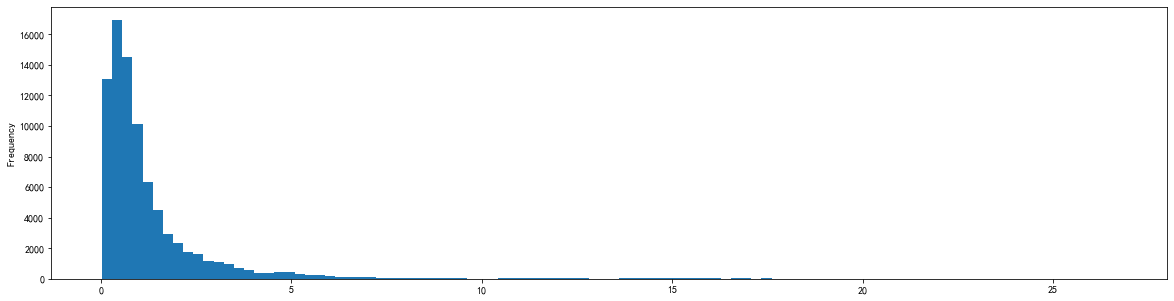

In [21]:
h5['fac']['avg_turn_60'].plot.hist(figsize=(20,5),bins=100)

In [22]:
h5['fac'].columns

Index(['avg_turn_20', 'avg_turn_240', 'avg_turn_60', 'beta_csi300_60_0',
       'close_0', 'date', 'fs_common_equity_0', 'fs_net_cash_flow_ttm_0',
       'fs_net_profit_yoy_0', 'fs_non_current_liabilities_0',
       'fs_operating_revenue_yoy_0', 'fs_total_equity_0',
       'fs_total_liability_0', 'instrument', 'market_cap_0',
       'market_cap_float_0', 'pb_lf_0', 'pe_ttm_0', 'return_60',
       'swing_volatility_60_0', 'volatility_60_0', 'west_eps_ftm_0'],
      dtype='object')

In [23]:
%%time
def _f(x:pd.DataFrame)->pd.DataFrame:
    return pd.concat(objs=[
        i(j(x.iloc[:,0])) 
        for j in  [f_mad,f_sigma,f_quantile,f_rank]
        for i in [f_z_score,f_max_min] 
    ],axis=1)
    pass
x=(h5['fac']
 .set_index('date')
 .loc[:,['beta_csi300_60_0']]
 .groupby('date')
 .apply(_f)
)

Wall time: 4.64 s


In [24]:
x.head()

beta_csi300_60_0  beta_csi300_60_0  beta_csi300_60_0  \
date                                                               
2019-03-04         -0.513889         -0.186634         -0.513889   
2019-03-04         -0.642528         -0.237023         -0.642528   
2019-03-04          0.983217          0.399791          0.983217   
2019-03-04         -1.354657         -0.515968         -1.354657   
2019-03-04         -0.756264         -0.281574         -0.756264   

            beta_csi300_60_0  beta_csi300_60_0  beta_csi300_60_0  \
date                                                               
2019-03-04         -0.186634         -0.520424         -0.253032   
2019-03-04         -0.237023         -0.650494         -0.313145   
2019-03-04          0.399791          0.993339          0.446564   
2019-03-04         -0.515968         -1.370546         -0.645923   
2019-03-04         -0.281574         -0.765495         -0.366294   

            beta_csi300_60_0  beta_csi300_60_0  
date                                            
2019-03-04         -0.543600         -0.314815  
2019-03-04         -0.735459         -0.425926  
2019-03-04          1.076541          0.623457  
2019-03-04         -1.513553         -0.876543  
2019-03-04         -0.916659         -0.530864

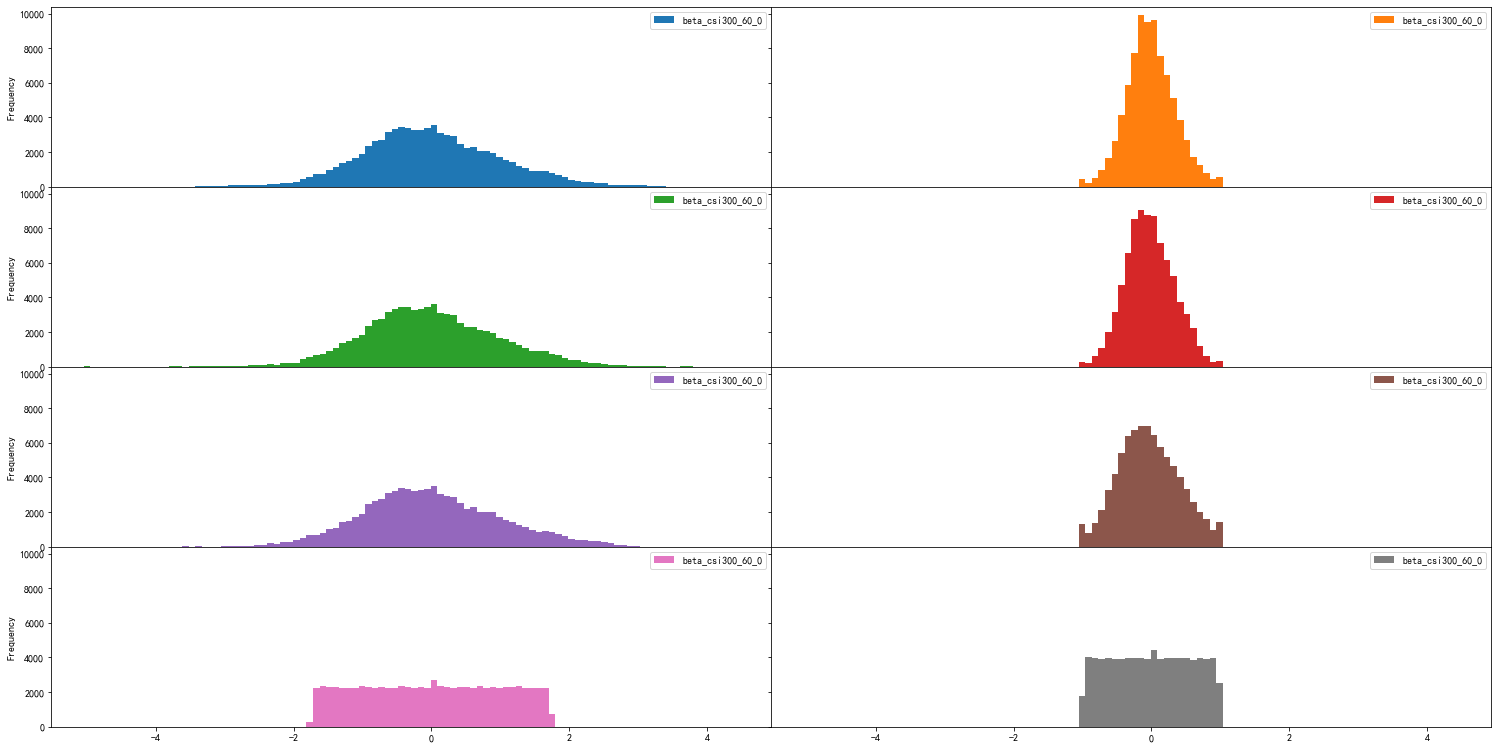

In [25]:
x.plot.hist(figsize=(20,10),bins=100,subplots=True,sharex=True,sharey=True,layout=(4,2))
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

Â∞èÁªìÔºö
1. z_scoreÁöÑÂÄºÂüüÂ§ß‰∫émaxminÔºåÊâÄ‰ª•Êï∞ÊçÆÂàÜÂ∏ÉÁõ∏ÂØπÂàÜÊï£
2. ÊéíÂ∫èÊ≥ïÁõ∏ÂØπ‰∫éÂÖ∂‰ªñÊï∞ÊçÆÂàÜÊï£ËæÉ‰∏∫ÂùáÂåÄ
3. madÂíåsigmaÁöÑÊûÅÂÄºÂ§ÑÁêÜÊñπÊ≥ïÁõ∏Â∑Æ‰∏çÂ§ß

### ÊúâÊïàÂõ†Â≠êËØÜÂà´

In [26]:
fac_f={
'market_cap_0':'ÊÄªÂ∏ÇÂÄº',
'market_cap_float_0':'ÊµÅÈÄöÂ∏ÇÂÄº',
'close_0':'Êî∂Áõò‰ª∑',
'pb_lf_0':'Â∏ÇÂáÄÁéá(LF)',
'pe_ttm_0':'Â∏ÇÁõàÁéá(TTM)',
'fs_net_cash_flow_ttm_0':'ÁªèËê•Ê¥ªÂä®Áé∞ÈáëÂáÄÊµÅÈáè(TTM)',
'fs_net_profit_yoy_0':'ÂΩíÂ±ûÊØçÂÖ¨Âè∏ËÇ°‰∏úÁöÑÂáÄÂà©Ê∂¶ÂêåÊØîÂ¢ûÈïøÁéá',
'fs_operating_revenue_yoy_0':'Ëê•‰∏öÊî∂ÂÖ•ÂêåÊØîÂ¢ûÈïøÁéá',
'fs_non_current_liabilities_0':'ÈùûÊµÅÂä®Ë¥üÂÄ∫',
'fs_common_equity_0':'ÊôÆÈÄöËÇ°ÊùÉÁõäÊÄªÈ¢ù',
'fs_total_liability_0':'Ë¥üÂÄ∫ÂêàËÆ°',
'fs_total_equity_0':'ÊâÄÊúâËÄÖÊùÉÁõäÂêàËÆ°',
'avg_turn_20':'ËøáÂéªi‰∏™‰∫§ÊòìÊó•ÁöÑÂπ≥ÂùáÊç¢ÊâãÁéá',
'avg_turn_60':'ËøáÂéªi‰∏™‰∫§ÊòìÊó•ÁöÑÂπ≥ÂùáÊç¢ÊâãÁéá',
'avg_turn_240':'ËøáÂéªi‰∏™‰∫§ÊòìÊó•ÁöÑÂπ≥ÂùáÊç¢ÊâãÁéá',
'beta_csi300_60_0':'BETAÂÄº(Ê≤™Ê∑±300)',
'return_60':'ËøáÂéªi‰∏™‰∫§ÊòìÊó•ÁöÑÊî∂Áõä',
'volatility_60_0':'Ê≥¢Âä®Áéá',
'swing_volatility_60_0':'ÊåØÂπÖÊ≥¢Âä®Áéá',
'west_eps_ftm_0':'‰∏ÄËá¥È¢ÑÊµãÊØèËÇ°Êî∂ÁõäÔºàÊú™Êù•12‰∏™ÊúàÔºâ',
}

In [27]:
h5['fac'].columns

Index(['avg_turn_20', 'avg_turn_240', 'avg_turn_60', 'beta_csi300_60_0',
       'close_0', 'date', 'fs_common_equity_0', 'fs_net_cash_flow_ttm_0',
       'fs_net_profit_yoy_0', 'fs_non_current_liabilities_0',
       'fs_operating_revenue_yoy_0', 'fs_total_equity_0',
       'fs_total_liability_0', 'instrument', 'market_cap_0',
       'market_cap_float_0', 'pb_lf_0', 'pe_ttm_0', 'return_60',
       'swing_volatility_60_0', 'volatility_60_0', 'west_eps_ftm_0'],
      dtype='object')

ÊúâÊïàÂõ†Â≠êÂ∫îËØ•Êª°Ë∂≥‰∏§‰∏™Êù°‰ª∂Ôºö
1. Á¨¨‰∏ÄÊòØÂú®ÈÄªËæë‰∏äÂ∫îËØ•ÂíåÊî∂ÁõäÁéáÂ≠òÂú®‰∏ÄÂÆöÁöÑÁõ∏ÂÖ≥ÊÄßÔºõ
1. Á¨¨‰∫åÊòØÂú®ÂÆûËØÅ‰∏≠Á°ÆÂÆûÂíåÊî∂ÁõäÁéáÂ≠òÂú®ÊØîËæÉÊòéÊòæÁöÑÁõ∏ÂÖ≥ÊÄß„ÄÇ

#### ÂçïÂõ†Â≠êÂõûÂΩíÁ°ÆÂÆöÊØè‰∏™Âõ†Â≠êÊØèÊúüÁöÑÂõ†Â≠êÊî∂Áõä
Â∏ÇÂú∫È£éÈô©„ÄÅË°å‰∏öÈ£éÈô©„ÄÅÈ£éÊ†ºÈ£éÈô©ÊòØÂΩ±ÂìçËÇ°Á•®Êî∂ÁõäÊúÄ‰∏ªË¶ÅÁöÑ‰∏âÁßçÂõ†Á¥†ÔºåÂú®È™åËØÅÈ£éÊ†ºÂõ†Â≠êÊúâÊïàÊÄßÊó∂ÔºåÂøÖÈ°ªËÄÉËôëÂ∏ÇÂú∫Âõ†Â≠êÂíåË°å‰∏öÂõ†Â≠êÁöÑÂΩ±Âìç„ÄÇÂØπ‰∫éÂ∏ÇÂú∫Âõ†Â≠êÂíåË°å‰∏öÂõ†Â≠êÁöÑÂ§ÑÁêÜÊñπÂºèÊúâ‰∏§ÁßçÔºö
1. Â∏ÇÂú∫Âõ†Â≠êÂíåË°å‰∏öÂõ†Â≠êÂêåÊó∂Á∫≥ÂÖ•Ê®°ÂûãÔºõ
2. ‰ªÖÁ∫≥ÂÖ•Ë°å‰∏öÂõ†Â≠êÔºåËÄåÂ∞ÜÂ∏ÇÂú∫Âõ†Â≠êÂåÖÂê´Âú®Ë°å‰∏öÂõ†Â≠ê‰∏≠„ÄÇ

ÂçïÂõ†Â≠êÂõûÂΩíÊ®°ÂûãÔºö
>$\large\tilde{r_j^t}=\sum_{s=1}^S{X_{js}^t\tilde{f_s^t}}+X_{jk}^t\tilde{f_k^t}+\tilde{u_j^t}\\
\tilde{r_j^t}:ËÇ°Á•®ùëóÂú®Á¨¨ùë°ÊúüÁöÑÊî∂ÁõäÁéá\\
X_{js}^t:ËÇ°Á•®ùëóÂú®Á¨¨ùë°ÊúüÂú®Ë°å‰∏öùë†‰∏äÁöÑÊö¥Èú≤\\
\tilde{f_s^t}:Ë°å‰∏öùë†Âú®Á¨¨ùë°ÊúüÁöÑÊî∂ÁõäÁéá\\
X_{jk}^t:ËÇ°Á•®ùëóÂú®Á¨¨ùë°ÊúüÂú®Âõ†Â≠êùëò‰∏äÁöÑÊö¥Èú≤\\
\tilde{f_k^t}:Âõ†Â≠êùëòÂú®Á¨¨ùë°ÊúüÁöÑÊî∂ÁõäÁéá
$

In [28]:
# Êî∂ÁõäÁéá
a=h5['obj_close'].set_index(['date','instrument']).groupby('instrument').apply(lambda i:np.log(i).diff().fillna(0))
assert a.isna().sum().sum()==0

In [29]:
# Ë°å‰∏öÂìëÂèòÈáè
b=pd.get_dummies(data=
    h5['obj_cls']
    .merge(right=h5['ind_info'],left_on='industry_sw_level1',right_on='memo',how='outer')
    .loc[:,['date','instrument','industriesname']],
               columns=['industriesname'],
               prefix='',prefix_sep='',
              ).set_index(['date','instrument'])

In [30]:
%%time
# Âõ†Â≠ê,ÂØπ‰∫éÂçï‰∏™Ê†áÁöÑffillÂ°´ÂÖÖÔºåÊà™Èù¢Ê†áÂáÜÂåñÂ§ÑÁêÜ
c=(
    h5['fac']
    .set_index(['date','instrument'])
    .groupby('instrument')
    .apply(lambda i:i.fillna(method='ffill'))
    .groupby('date')
    .apply(lambda i:i.apply(lambda j:f_z_score(f_mad(j)),axis=0))
)

Wall time: 18.9 s


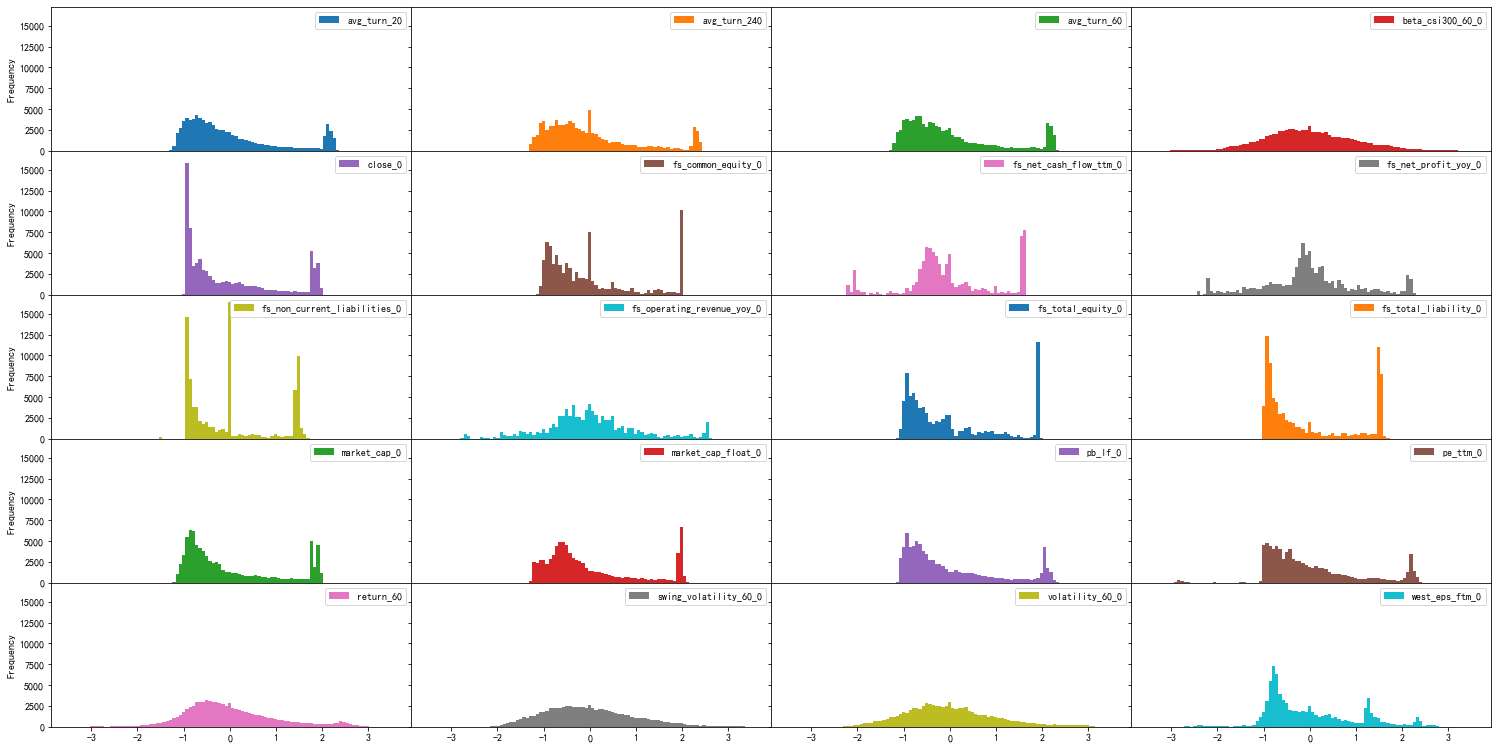

In [31]:
c.plot.hist(figsize=(20,10),bins=100,subplots=True,sharex=True,sharey=True,layout=(5,4))
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

In [32]:
[i.shape for i in (a,b,c)]

[(96594, 1), (84115, 28), (83761, 20)]

In [33]:
x=pd.concat(objs=(a,b,c),join='inner',axis=1).sort_index(axis=0,level=0)
x.shape

(83761, 49)

In [34]:
x.head()

s_dq_adjclose  ‰∫§ÈÄöËøêËæì  ‰ºëÈó≤ÊúçÂä°  ‰º†Â™í  ÂÖ¨Áî®‰∫ã‰∏ö  ÂÜúÊûóÁâßÊ∏î  ÂåñÂ∑•  ÂåªËçØÁîüÁâ©  \
date       instrument                                                        
2019-03-04 000001.SZA       0.017867     0     0   0     0     0   0     0   
           000002.SZA       0.039842     0     0   0     0     0   0     0   
           000063.SZA       0.019328     0     0   0     0     0   0     0   
           000069.SZA       0.025434     0     0   0     0     0   0     0   
           000100.SZA       0.048214     0     0   0     0     0   0     0   

                       ÂïÜ‰∏öË¥∏Êòì  ÂõΩÈò≤ÂÜõÂ∑•  ...  fs_total_equity_0  \
date       instrument              ...                      
2019-03-04 000001.SZA     0     0  ...           1.939115   
           000002.SZA     0     0  ...           1.939115   
           000063.SZA     0     0  ...          -0.115937   
           000069.SZA     0     0  ...           0.928633   
           000100.SZA     0     0  ...           0.556949   

                       fs_total_liability_0  market_cap_0  market_cap_float_0  \
date       instrument                                                           
2019-03-04 000001.SZA              1.513909      1.735560            1.987411   
           000002.SZA              1.513909      1.735560            1.987411   
           000063.SZA              0.366676      1.512597            1.363019   
           000069.SZA              1.513909     -0.149966           -0.011517   
           000100.SZA              0.894358     -0.444132           -0.165871   

                        pb_lf_0  pe_ttm_0  return_60  swing_volatility_60_0  \
date       instrument                                                         
2019-03-04 000001.SZA -0.947311 -0.850419   0.497739              -0.362054   
           000002.SZA -0.324620 -0.781435  -0.343140              -0.835004   
           000063.SZA  1.199468 -2.062692   2.024203               1.181193   
           000069.SZA -0.911255 -0.955685  -0.265474              -0.656485   
           000100.SZA -0.689294 -0.618485   1.261894               1.212345   

                       volatility_60_0  west_eps_ftm_0  
date       instrument                                   
2019-03-04 000001.SZA        -0.252275        0.556790  
           000002.SZA        -0.442679        2.487076  
           000063.SZA         1.165053       -2.447568  
           000069.SZA        -0.517324        0.188243  
           000100.SZA         0.643711       -0.947404  

[5 rows x 49 columns]

In [35]:
%%time
def _f(x:pd.DataFrame)->pd.DataFrame:
    y=pd.concat(
        objs=[
            stm.OLS(
                endog=x.loc[:,a.columns],
                exog =x.loc[:,b.columns.to_list()+[i]] 
            ).fit().params[-1:]
            for i in c.columns
        ]
    )
    return y
y=x.groupby('date').apply(_f)# .loc[('2019-03-04',slice(None)),:]

d:\pp\miniconda3\envs\pyqi\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


Wall time: 18.9 s


#### Âõ†Â≠êÊî∂ÁõäÁéáÂ∫èÂàóùë°Ê£ÄÈ™å
1. tÊ£ÄÈ™å
>$\large t=\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n-1}}}\\
t:xÁöÑtÁªüËÆ°Èáè\\
\bar{x}:Ê†∑Êú¨ÁöÑÂùáÂÄº\\
\mu:ÊÄª‰ΩìÁöÑÂùáÂÄº\\
\sigma:Ê†∑Êú¨ÁöÑÊ†áÂáÜÂ∑Æ\\
n:Ê†∑Êú¨ÁöÑÂÆπÈáè\\
$
2. ‰∏âÊñπÈù¢ÁöÑÂàÜÊûê:
    1. ùë°ÂÄºÁªùÂØπÂÄºÂ∫èÂàóÁöÑÂùáÂÄº
    2. ùë°ÂÄºÁªùÂØπÂÄºÂ∫èÂàóÂ§ß‰∫é2ÁöÑÊØî‰æã
    3. Âõ†Â≠êÊî∂ÁõäÁéá$\tilde{f_k^t}$Â∫èÂàóÁöÑùë°ÂÄºÊ£ÄÈ™å
3. ÊúâÊïàÂõ†Â≠ê(Â∞±ÊòØÂíåÊî∂ÁõäÁéáÂ≠òÂú®ÂæàÊòéÊòæÁõ∏ÂÖ≥ÊÄßÁöÑÂõ†Â≠êÔºåÂç≥Êª°Ë∂≥ÂâçÈù¢ÁöÑùë°ÁöÑÁ¨¨‰∏ÄÁÇπÂíåÁ¨¨‰∫åÁÇπ)ÁöÑÂàÜÁ±ª(Ê†πÊçÆÁ¨¨‰∏âÁÇπ):
    1. Êî∂ÁõäÁ±ªÂõ†Â≠ê
    2. È£éÈô©Á±ªÂõ†Â≠ê


In [36]:
%%time
def _f(x:pd.DataFrame)->pd.DataFrame:
    y=pd.concat(
        objs=[
            stm.OLS(
                endog=x.loc[:,a.columns],
                exog =x.loc[:,b.columns.to_list()+[i]] 
            ).fit().tvalues[-1:]
            for i in c.columns
        ]
    )
    return y
z=x.groupby('date').apply(_f)# .loc[('2019-03-04',slice(None)),:]

Wall time: 19.4 s


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

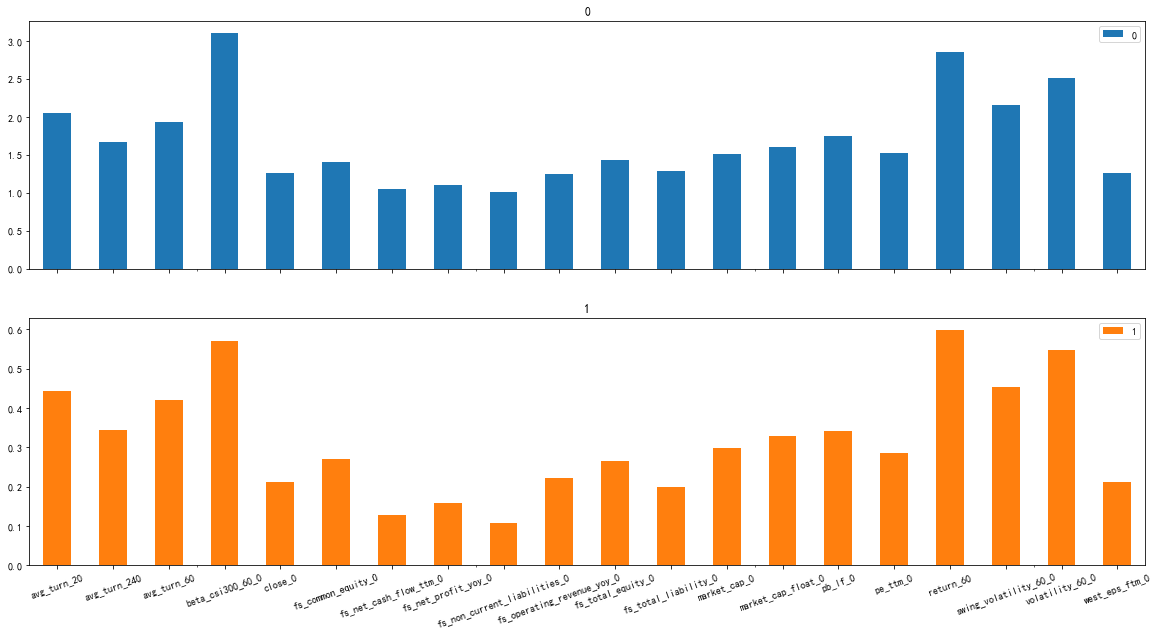

In [37]:
def _f(x:pd.Series):
    return pd.Series([x.mean(),x[x>2].count()/x.count(),])
    pass
z.abs().apply(_f).T.plot.bar(figsize=(20,10),subplots=True)
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

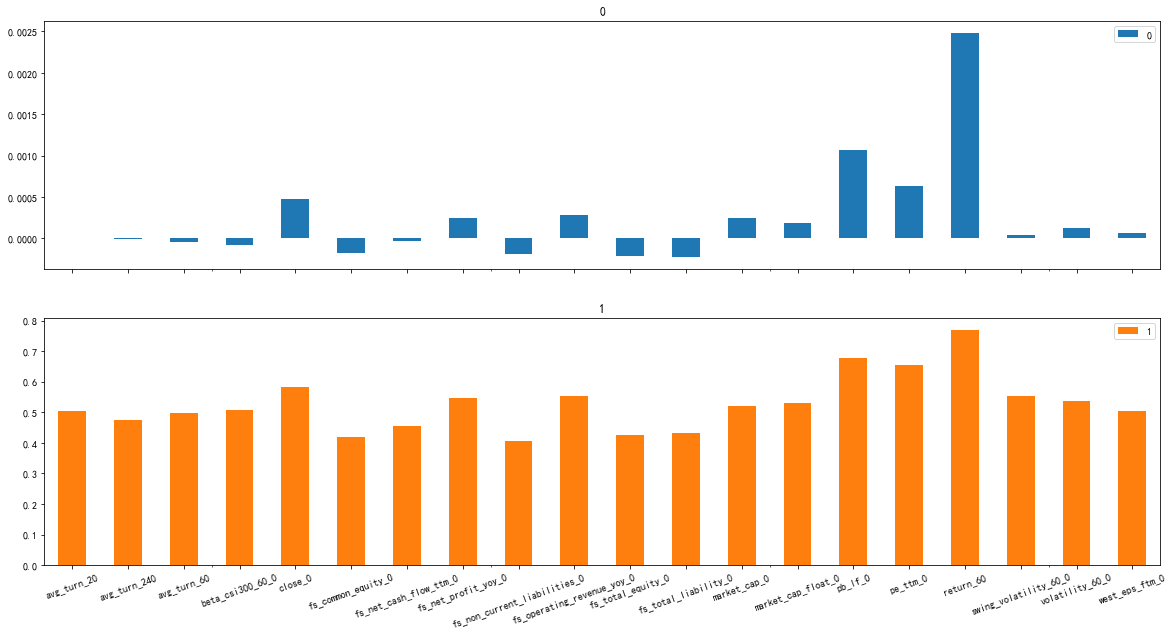

In [38]:
def _f(x:pd.Series):
    return pd.Series([x.mean(),x[x>0].count()/x.count(),])
    pass
y.apply(_f).T.plot.bar(figsize=(20,10),subplots=True)
plt.xticks(rotation=20)

#### Âõ†Â≠êICÂÄºËæÖÂä©Ê£ÄÈ™å
1. Âõ†Â≠êùëòÁöÑICÂÄºÔºå‰∏ÄËà¨ÊòØÊåá‰∏™ËÇ°Á¨¨ùëáÊúüÂú®Âõ†Â≠êùëò‰∏äÁöÑÊö¥Èú≤Â∫¶‰∏éùëá+1ÊúüÁöÑÊî∂ÁõäÁéáÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞Ôºõ
2. Âõ†Â≠ê IC ÂÄºÂèçÊò†ÁöÑÊòØ‰∏™ËÇ°‰∏ãÊúüÊî∂ÁõäÁéáÂíåÊú¨ÊúüÂõ†Â≠êÊö¥Èú≤Â∫¶ÁöÑÁ∫øÊÄßÁõ∏ÂÖ≥Á®ãÂ∫¶ÔºåÂèçÂ∫îËØ•Âõ†Â≠êËøõË°åÊî∂ÁõäÁéáÈ¢ÑÊµãÁöÑÁ®≥ÂÅ•ÊÄßÔºõ
3. ÂõûÂΩíÊ≥ï‰∏≠ËÆ°ÁÆóÂá∫ÁöÑÂõ†Â≠êÊî∂ÁõäÁéáÊú¨Ë¥®‰∏äÊòØ‰∏Ä‰∏™ÊñúÁéáÔºåÂèçÊò†ÁöÑÊòØ‰ªéËØ•Âõ†Â≠êÂèØËÉΩËé∑ÂæóÁöÑÊî∂ÁõäÁöÑÂ§ßÂ∞èÔºåËøôÂπ∂‰∏çËÉΩ‰ª£Ë°®‰ªª‰ΩïÂÖ≥‰∫éÁ®≥ÂÅ•ÊÄßÁöÑ‰ø°ÊÅØÔºõ
4. Âú®Âà©Áî® IC ÂÄºËØÑ‰ª∑Âõ†Â≠êÊúâÊïàÊÄßÊó∂ÔºåÂèØ‰ª•È¢ÑÂÖàÂØπÂõ†Â≠êËøõË°åÊèêÁ∫ØÔºåÊéíÈô§Ë°å‰∏ö„ÄÅÂ∏ÇÂÄºÁ≠âÈáçË¶ÅÂõ†Á¥†ÁöÑ
ÂΩ±ÂìçÔºå‰ΩøÁªìÊûúÊõ¥ÊòéÊô∞„ÄÇÂÖ∑‰ΩìÊù•ËØ¥ÔºåÂ∞±ÊòØÂú®Âõ†Â≠êÊ†áÂáÜÂåñÂ§ÑÁêÜ‰πãÂêéÔºåÂú®ÊØè‰∏™Êà™Èù¢Êúü‰∏äÁî®ÂÖ∂ÂÅöÂõ†Âèò
ÈáèÂØπÂ∏ÇÂÄºÂõ†Â≠êÂèäË°å‰∏öÂõ†Â≠êÁ≠âÂÅöÁ∫øÊÄßÂõûÂΩíÔºåÂèñÊÆãÂ∑Æ‰Ωú‰∏∫Âõ†Â≠êÂÄºÁöÑ‰∏Ä‰∏™Êõø‰ª£ÔºåËøôÁßçÂÅöÊ≥ïÂèØ‰ª•Ê∂àÈô§
Âõ†Â≠êÂú®Ë°å‰∏ö„ÄÅÊùøÂùó„ÄÅÂ∏ÇÂÄºÁ≠âÊñπÈù¢ÁöÑÂÅèÁ¶ª„ÄÇ

In [39]:
%%time
# Ê±ÇÊÆãÂ∑ÆÂ∫èÂàó
def _f0(y:pd.Series,x:pd.DataFrame)->pd.Series:
    return y-stm.OLS(endog=y,exog =x,).fit().predict(x)
def _f1(x:pd.DataFrame)->pd.DataFrame:
    _x=x.loc[:,b.columns.to_list()+['market_cap_0']]
    return pd.DataFrame(
        data={i:_f0(y=x.loc[:,i],x=_x) for i in c.columns}
    )
def _f2(x:pd.DataFrame)->pd.Series:
    return x.loc[:,c.columns].corrwith(x.loc[:,a.columns[-1]])
    pass
y=x.groupby('date').apply(_f1).merge(#.loc[('2019-06-04',slice(None)),:]
    right=a.groupby('instrument').apply(lambda i:i.shift(-1)),
    right_index=True,left_index=True,how='inner'
).sort_index(axis=0,level=0).groupby('date').apply(_f2)

Wall time: 16.5 s


5. ÂΩìÂæóÂà∞ÂêÑÂõ†Â≠ê IC ÂÄºÂ∫èÂàóÂêéÔºåÊàë‰ª¨ÂèØ‰ª•‰ªøÁÖß‰∏ä‰∏ÄÂ∞èËäÇùë°Ê£ÄÈ™åÁöÑÂàÜÊûêÊñπÊ≥ïËøõË°åËÆ°ÁÆóÔºö
    1. IC ÂÄºÂ∫èÂàóÁöÑÂùáÂÄºÂèäÁªùÂØπÂÄºÂùáÂÄºÔºöÂà§Êñ≠Âõ†Â≠êÊúâÊïàÊÄßÔºõ
    2. IC ÂÄºÂ∫èÂàóÁöÑÊ†áÂáÜÂ∑ÆÔºöÂà§Êñ≠Âõ†Â≠êÁ®≥ÂÆöÊÄßÔºõ
    3. IC ÂÄºÂ∫èÂàóÂ§ß‰∫éÈõ∂ÔºàÊàñÂ∞è‰∫éÈõ∂ÔºâÁöÑÂç†ÊØîÔºöÂà§Êñ≠Âõ†Â≠êÊïàÊûúÁöÑ‰∏ÄËá¥ÊÄß„ÄÇ


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

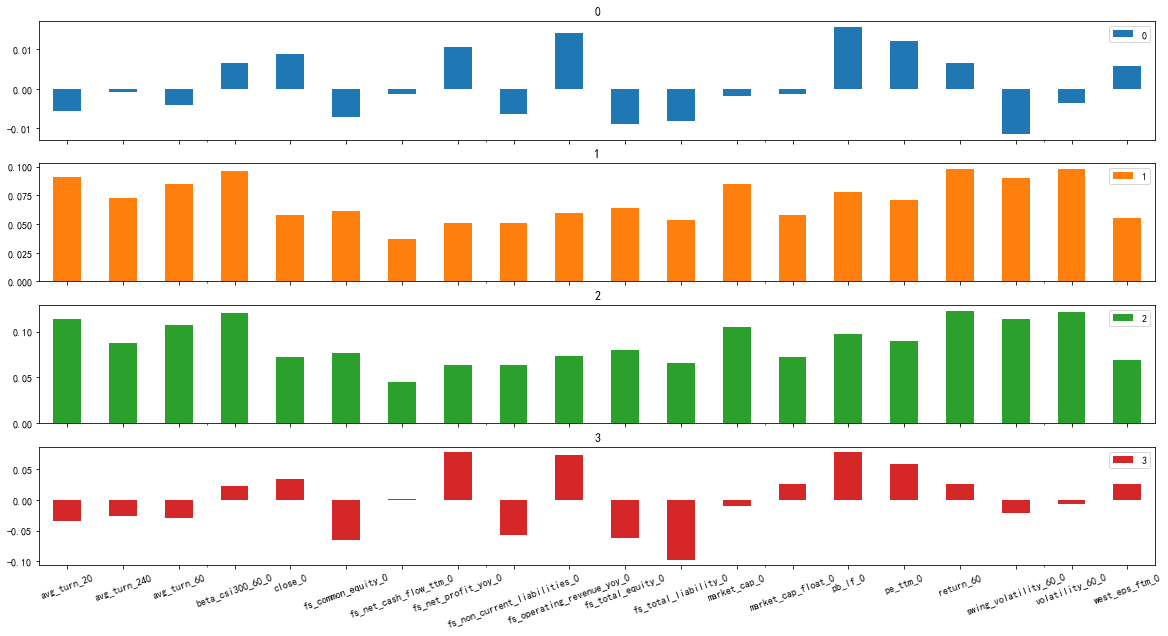

In [40]:
def _f(x:pd.Series)->pd.Series:
    return pd.Series([
        x.mean(),x.abs().mean(),x.std(ddof=0),x[x>0].count()/x.count()-.5,
    ])
    pass
y.apply(_f).T.plot.bar(figsize=(20,10),subplots=True)
plt.xticks(rotation=20)

#### Âõ†Â≠êÊâìÂàÜÊ≥ïÂõûÊµãËæÖÂä©Èâ¥Âà´
ËØ¶ËßÅ„Ääalphalens„Äã

## Êî∂ÁõäÊ®°Âûã

### ËµÑ‰∫ßÊî∂ÁõäÊ®°Âûã

$\begin{bmatrix}\tilde{r_1}\\\vdots\\\tilde{r_n}\end{bmatrix}=\begin{bmatrix}X_{11}&\dots&X_{1k}\\\vdots&\ddots&\vdots\\X_{n1}&\dots&X_{nk}\end{bmatrix}\begin{bmatrix}\tilde{f_1}\\\vdots\\\tilde{f_k}\end{bmatrix}+\begin{bmatrix}\tilde{\mu_1}\\\vdots\\\tilde{\mu_n}\end{bmatrix}$
1. $\tilde{r}$ÔºöÊ†áÁöÑÈ¢ÑÊúüÊî∂Áõä
2. $X$ÔºöÊ†áÁöÑÂõ†Â≠êÊö¥Êºè
3. $\tilde{f}$ÔºöÂõ†Â≠êÈ¢ÑÊúüÊî∂Áõä
4. $\tilde{\mu}$ÔºöÊÆãÂ∑ÆÊî∂Áõä

### Â§ßÁ±ªÂõ†Â≠êÂàÜÊûê
Âú®ÊúâÊïàÂõ†Â≠êÁ≠õÈÄâÂá∫Êù•‰πãÂêéÔºåÊàë‰ª¨È¶ñÂÖàÈúÄË¶ÅÊ†πÊçÆÂ§ßÁ±ªÂØπÂõ†Â≠êÁöÑÁõ∏ÂÖ≥ÊÄßËøõË°åùë°Ê£ÄÈ™åÔºåÂØπ‰∫éÁõ∏
ÂÖ≥ÊÄßËæÉÈ´òÁöÑÂõ†Â≠êÔºåË¶Å‰πàËàçÂºÉÊòæËëóÊÄßËæÉ‰ΩéÁöÑÂõ†Â≠êÔºåË¶Å‰πàËøõË°åÂõ†Â≠êÂêàÊàê„ÄÇ

#### ÂêåÁ±ªÂûãÂõ†Â≠êÁöÑÁõ∏ÂÖ≥ÊÄßÊ£ÄÈ™å
1. Áõ∏ÂÖ≥Á≥ªÊï∞ÁªùÂØπÂÄºÁöÑÂùáÂÄº
2. Áõ∏ÂÖ≥Á≥ªÊï∞ÁªùÂØπÂÄºÁöÑ‰∏≠‰ΩçÊï∞
3. tÊ£ÄÈ™å:

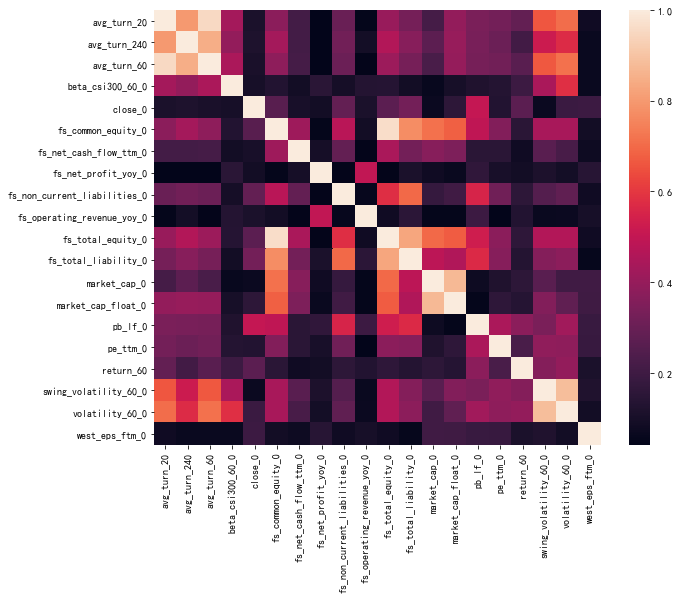

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(
    data=(c
          .groupby('date').apply(lambda i:i.corr())
          .groupby(level=1)
          .apply(lambda i:
                 i.abs().mean()# Áõ∏ÂÖ≥Á≥ªÊï∞ÁªùÂØπÂÄºÁöÑÂùáÂÄº
#                  i.abs().median()#Áõ∏ÂÖ≥Á≥ªÊï∞ÁªùÂØπÂÄºÁöÑ‰∏≠‰ΩçÊï∞
#                  i.abs().mean()/i.abs().std(ddof=1)*((i.count()-1)**(1/2))
                )
    )
)

In [42]:
(c
          .groupby('date').apply(lambda i:i.corr())
          .groupby(level=1)
          .apply(lambda i:
#                  i.abs().mean()# Áõ∏ÂÖ≥Á≥ªÊï∞ÁªùÂØπÂÄºÁöÑÂùáÂÄº
#                  i.abs().median()#Áõ∏ÂÖ≥Á≥ªÊï∞ÁªùÂØπÂÄºÁöÑ‰∏≠‰ΩçÊï∞
                 i.abs().mean()/i.abs().std(ddof=1)*((i.count()-1)**(1/2))
                ).round(0)
    )

avg_turn_20  avg_turn_240  avg_turn_60  \
avg_turn_20                           inf         440.0       1247.0   
avg_turn_240                        440.0           inf        826.0   
avg_turn_60                        1247.0         826.0          inf   
beta_csi300_60_0                    146.0          87.0        148.0   
close_0                              29.0          77.0         29.0   
fs_common_equity_0                  139.0         681.0        166.0   
fs_net_cash_flow_ttm_0              181.0         200.0        280.0   
fs_net_profit_yoy_0                  27.0          17.0         31.0   
fs_non_current_liabilities_0        154.0         328.0        172.0   
fs_operating_revenue_yoy_0           31.0          28.0         31.0   
fs_total_equity_0                   188.0         575.0        224.0   
fs_total_liability_0                145.0         211.0        189.0   
market_cap_0                         62.0          75.0         60.0   
market_cap_float_0                  115.0         150.0        116.0   
pb_lf_0                              59.0         198.0         58.0   
pe_ttm_0                             65.0          70.0         69.0   
return_60                            31.0          30.0         31.0   
swing_volatility_60_0               280.0         159.0        455.0   
volatility_60_0                     406.0         210.0        527.0   
west_eps_ftm_0                       21.0          25.0         21.0   

                              beta_csi300_60_0  close_0  fs_common_equity_0  \
avg_turn_20                              146.0     29.0               139.0   
avg_turn_240                              87.0     77.0               681.0   
avg_turn_60                              148.0     29.0               166.0   
beta_csi300_60_0                           inf     25.0                28.0   
close_0                                   25.0      inf               425.0   
fs_common_equity_0                        28.0    425.0                 inf   
fs_net_cash_flow_ttm_0                    28.0     91.0                95.0   
fs_net_profit_yoy_0                       33.0     29.0                68.0   
fs_non_current_liabilities_0              20.0    314.0               249.0   
fs_operating_revenue_yoy_0                36.0     27.0                22.0   
fs_total_equity_0                         30.0    415.0              1002.0   
fs_total_liability_0                      21.0    436.0               430.0   
market_cap_0                              26.0     27.0               382.0   
market_cap_float_0                        41.0     78.0               539.0   
pb_lf_0                                   25.0    221.0               475.0   
pe_ttm_0                                  34.0     27.0               105.0   
return_60                                 25.0     57.0                26.0   
swing_volatility_60_0                     78.0     21.0               104.0   
volatility_60_0                           99.0     43.0               138.0   
west_eps_ftm_0                            23.0     23.0                22.0   

                              fs_net_cash_flow_ttm_0  fs_net_profit_yoy_0  \
avg_turn_20                                    181.0                 27.0   
avg_turn_240                                   200.0                 17.0   
avg_turn_60                                    280.0                 31.0   
beta_csi300_60_0                                28.0                 33.0   
close_0                                         91.0                 29.0   
fs_common_equity_0                              95.0                 68.0   
fs_net_cash_flow_ttm_0                           inf                 42.0   
fs_net_profit_yoy_0                             42.0                  inf   
fs_non_current_liabilities_0                   104.0                 73.0   
fs_operating_revenue_yoy_0                      19.0                144.0   
fs_total_e

#### Âõ†Â≠êÂèñËàçÊàñËÄÖÂõ†Â≠êÂêàÊàê
1. Ê†πÊçÆÂõ†Â≠êÊú¨Ë∫´ÁöÑÊúâÊïàÊÄßËøõË°åÊéíÂ∫èÔºåÊåëÈÄâÊúÄÊúâÊïàÁöÑÂõ†Â≠êËøõË°å‰øùÁïôÔºåÂà†Èô§ÂÖ∂‰ªñÂõ†Â≠ê
2. ÂØπÂõ†Â≠êÈõÜÂêàËøõË°åÂêàÊàêÔºåÂ∞ΩÂèØËÉΩÂ§öÁöÑ‰øùÁïôÊúâÊïàÂõ†Â≠ê‰ø°ÊÅØÔºõ

In [43]:
x.columns

Index(['s_dq_adjclose', '‰∫§ÈÄöËøêËæì', '‰ºëÈó≤ÊúçÂä°', '‰º†Â™í', 'ÂÖ¨Áî®‰∫ã‰∏ö', 'ÂÜúÊûóÁâßÊ∏î', 'ÂåñÂ∑•', 'ÂåªËçØÁîüÁâ©',
       'ÂïÜ‰∏öË¥∏Êòì', 'ÂõΩÈò≤ÂÜõÂ∑•', 'ÂÆ∂Áî®ÁîµÂô®', 'Âª∫Á≠ëÊùêÊñô', 'Âª∫Á≠ëË£ÖÈ•∞', 'ÊàøÂú∞‰∫ß', 'ÊúâËâ≤ÈáëÂ±û', 'Êú∫Ê¢∞ËÆæÂ§á', 'Ê±ΩËΩ¶',
       'ÁîµÂ≠ê', 'ÁîµÊ∞îËÆæÂ§á', 'Á∫∫ÁªáÊúçË£Ö', 'ÁªºÂêà', 'ËÆ°ÁÆóÊú∫', 'ËΩªÂ∑•Âà∂ÈÄ†', 'ÈÄö‰ø°', 'ÈááÊéò', 'Èí¢ÈìÅ', 'Èì∂Ë°å',
       'ÈùûÈì∂ÈáëËûç', 'È£üÂìÅÈ•ÆÊñô', 'avg_turn_20', 'avg_turn_240', 'avg_turn_60',
       'beta_csi300_60_0', 'close_0', 'fs_common_equity_0',
       'fs_net_cash_flow_ttm_0', 'fs_net_profit_yoy_0',
       'fs_non_current_liabilities_0', 'fs_operating_revenue_yoy_0',
       'fs_total_equity_0', 'fs_total_liability_0', 'market_cap_0',
       'market_cap_float_0', 'pb_lf_0', 'pe_ttm_0', 'return_60',
       'swing_volatility_60_0', 'volatility_60_0', 'west_eps_ftm_0'],
      dtype='object')

In [44]:
y=['avg_turn_20', 'avg_turn_240', 'avg_turn_60',]

##### Á≠âÊùÉÊ≥ï

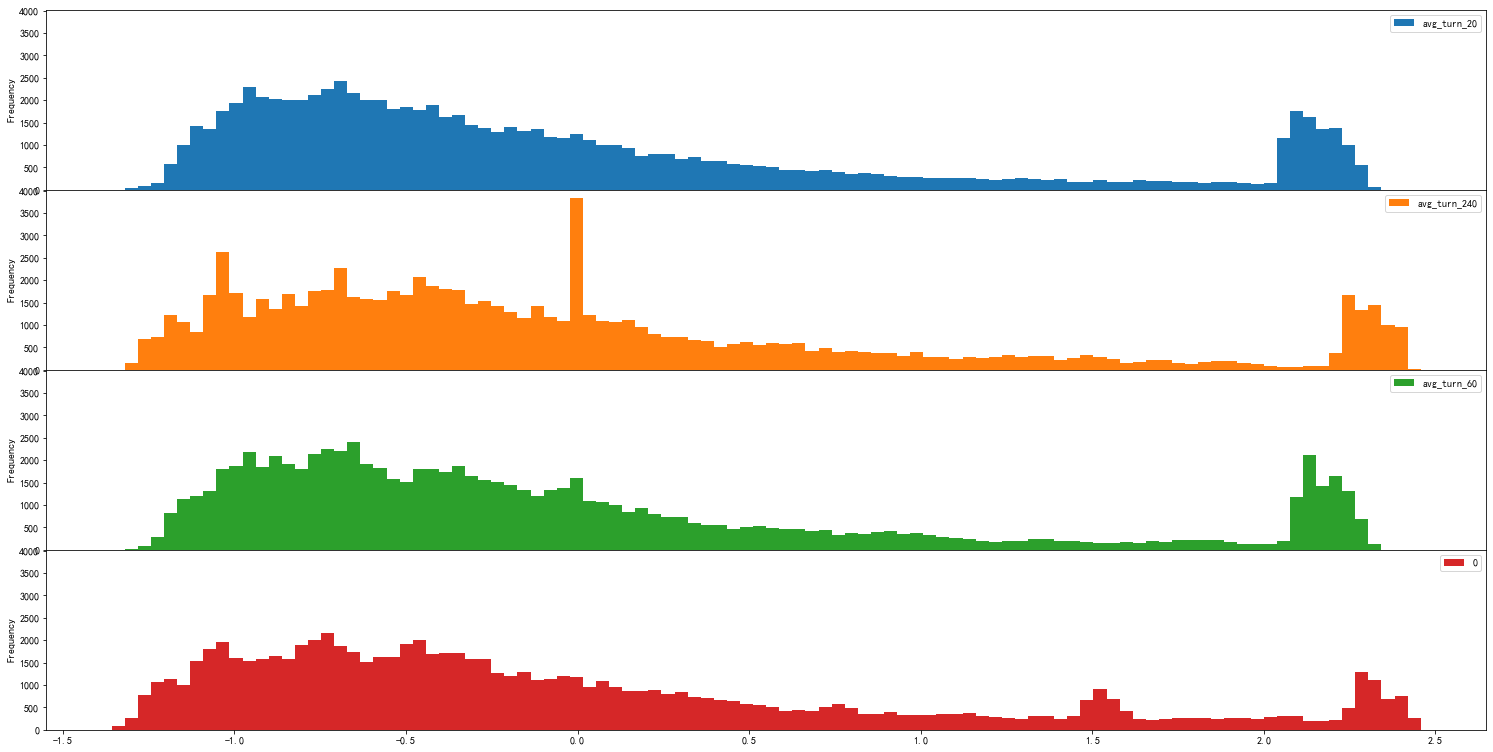

In [45]:
pd.concat(objs=(
    x.loc[:,y],
    f_z_score((x['avg_turn_20']+x['avg_turn_60']+x['avg_turn_240'])/3),)
          ,axis=1,).plot.hist(figsize=(20,10),bins=100,subplots=True,sharex=True,sharey=True,layout=(4,1))
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

##### ÂéÜÂè≤Êî∂ÁõäÁéáÂä†ÊùÉÊ≥ï

In [46]:
%%time
def _f(x:pd.DataFrame)->pd.DataFrame:
    y=pd.concat(
        objs=[
            stm.OLS(
                endog=x.loc[:,a.columns],
                exog =x.loc[:,b.columns.to_list()+[i]] 
            ).fit().params[-1:]
            for i in c.columns
        ]
    )
    return y
z=x.groupby('date').apply(_f)# .loc[('2019-03-04',slice(None)),:]

d:\pp\miniconda3\envs\pyqi\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


Wall time: 20.5 s


In [47]:
z.mean().loc[y].abs()/z.mean().loc[y].abs().sum()

avg_turn_20     0.049878
avg_turn_240    0.075297
avg_turn_60     0.874826
dtype: float64

##### ÂéÜÂè≤‰ø°ÊÅØÊØî‰æãÂä†ÊùÉÊ≥ï

In [48]:
%%time
# Ê±ÇÊÆãÂ∑ÆÂ∫èÂàó
def _f0(y:pd.Series,x:pd.DataFrame)->pd.Series:
    return y-stm.OLS(endog=y,exog =x,).fit().predict(x)
def _f1(x:pd.DataFrame)->pd.DataFrame:
    _x=x.loc[:,b.columns.to_list()+['market_cap_0']]
    return pd.DataFrame(
        data={i:_f0(y=x.loc[:,i],x=_x) for i in c.columns}
    )
def _f2(x:pd.DataFrame)->pd.Series:
    return x.loc[:,c.columns].corrwith(x.loc[:,a.columns[-1]])
    pass
z=x.groupby('date').apply(_f1).merge(#.loc[('2019-06-04',slice(None)),:]
    right=a.groupby('instrument').apply(lambda i:i.shift(-1)),
    right_index=True,left_index=True,how='inner'
).sort_index(axis=0,level=0).groupby('date').apply(_f2)

Wall time: 17.7 s


In [49]:
z=np.abs((np.linalg.inv(z.loc[:,y].cov())@z.loc[:,y].mean().values))
z=z/z.sum()

In [50]:
z

array([0.50163951, 0.29389813, 0.20446237])

##### ‰∏ªÊàêÂàÜÂàÜÊûê

In [51]:
pca=sdc.PCA(n_components=1)
pca.fit(x.loc[:,y])

PCA(n_components=1)

In [52]:
pca.explained_variance_ratio_,pca.explained_variance_

(array([0.91243615]), array([2.70360408]))

In [53]:
z=pca.transform((x.loc[:,y]))

In [54]:
z

array([[-0.92241302],
       [-1.05437087],
       [ 3.97803789],
       ...,
       [-1.39806967],
       [ 3.3389582 ],
       [ 0.2298251 ]])

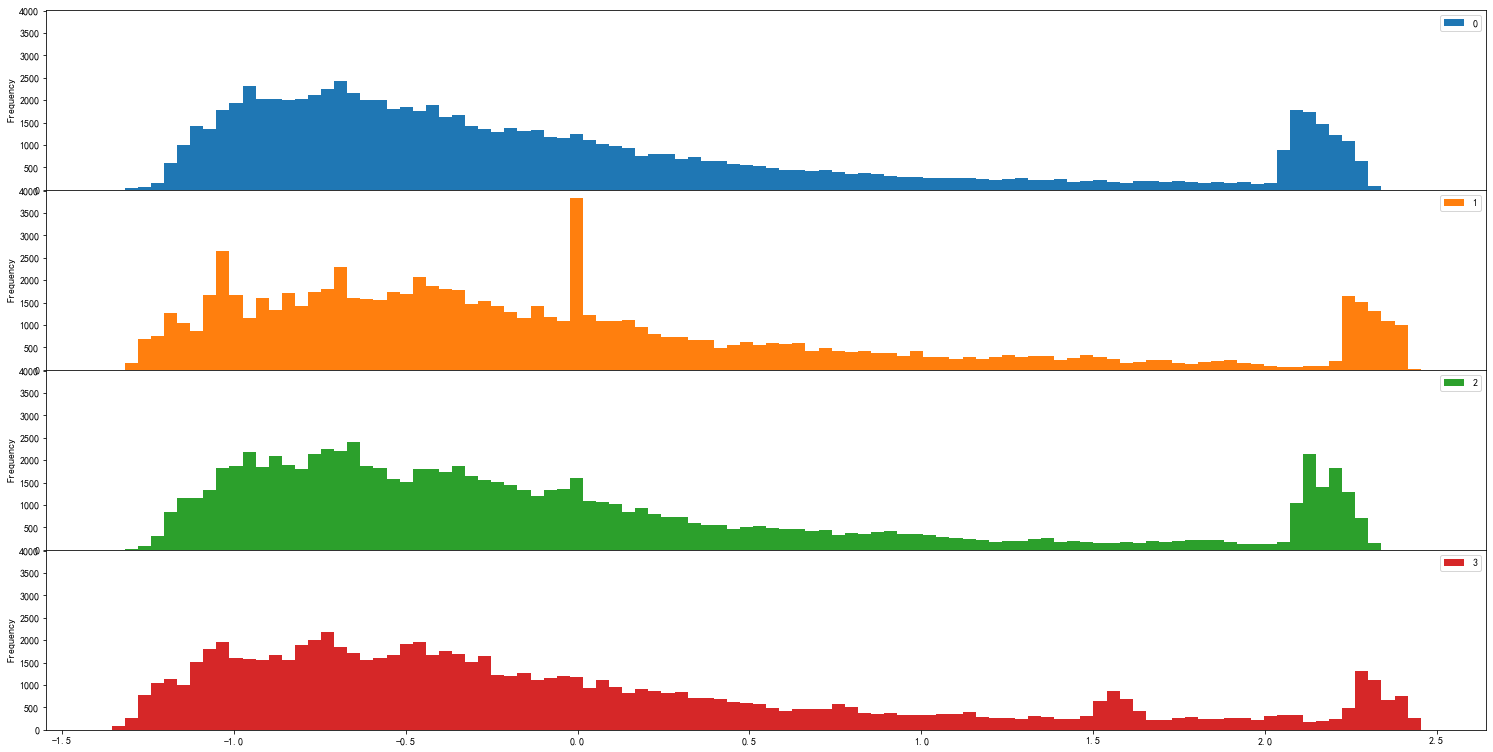

In [55]:
pd.DataFrame(np.c_[
    x.loc[:,y].values,
    f_z_score(pd.Series(z.reshape(-1))).values,
]).plot.hist(figsize=(20,10),bins=100,subplots=True,sharex=True,sharey=True,layout=(4,1))
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

### Âõ†Â≠êÂÖ±Á∫øÊÄßÂàÜÊûê

Âõ†Â≠êÂÖ±Á∫øÊÄßÂàÜÊûêÂíåÂ§ßÁ±ªÂõ†Â≠êÂàÜÊûêÁöÑÊú¨Ë¥®ÁõÆÊ†áÈÉΩÊòØ‰∏ÄËá¥ÁöÑÔºåÈÉΩÊòØÈÅøÂÖçÊúÄÁªàÁöÑÂõûÂΩíËøáÁ®ã‰∏≠Âá∫Áé∞Â§ö
ÈáçÂÖ±Á∫øÊÄßÈóÆÈ¢ò„ÄÇÂàÜ‰Ωú‰∏§‰∏™ÁéØËäÇËøõË°åÁöÑÁêÜÁî±ÊòØÔºöÂ¶ÇÊûúÊòØÁªèÊµéÂê´‰πâÁ±ª‰ººÁöÑÂêåÁ±ªÂûãÂõ†Â≠êÔºåÂ≠òÂú®ÊòéÊòæ
Áõ∏ÂÖ≥ÊÄßÔºå‰∏∫Â∞ΩÂèØËÉΩÂ§öÁöÑ‰øùÁïôÂõ†Â≠ê‰ø°ÊÅØÔºåÊàë‰ª¨ÂèØ‰ª•Â∞ÜÂõ†Â≠êËøõË°åÂêàÂπ∂ÔºõÂ¶ÇÊûúÊòØÁªèÊµéÂê´‰πâ‰∏çÂêåÁöÑÂõ†
Â≠êÔºåÂ≠òÂú®ÊòéÊòæÁõ∏ÂÖ≥ÊÄßÔºåÊàë‰ª¨Âè™ËÉΩÊúâÊâÄÂèñËàçÔºå‰øùÁïôÊõ¥Âä†ÊòæËëóÁöÑÂõ†Â≠êÔºåËÄåËàçÂºÉÁõ∏ÂØπ‰∏çÊòæËëóÁöÑÂõ†Â≠êÔºå
Âõ†‰∏∫Â§öÂõ†Â≠êÊ®°ÂûãÈô§‰∫ÜÊïàÊûúÔºåÊúÄÁªàËøòÊòØË¶ÅËÆ≤Ê±ÇÂõ†Â≠êÊú¨Ë∫´ÁöÑÁªèÊµéÂê´‰πâÁöÑ„ÄÇ

### ÊÆãÂ∑ÆÂºÇÊñπÂ∑ÆÂàÜÊûê

ÂºÇÊñπÂ∑ÆÊÄßÔºàHeteroscedasticityÔºâÊòØÁõ∏ÂØπ‰∫éÂêåÊñπÂ∑ÆËÄåË®ÄÁöÑ„ÄÇÊâÄË∞ìÂêåÊñπÂ∑ÆÔºåÊòØ‰∏∫‰∫Ü‰øùËØÅÂõûÂΩíÂèÇÊï∞
‰º∞ËÆ°ÈáèÂÖ∑ÊúâËâØÂ•ΩÁöÑÁªüËÆ°ÊÄßË¥®ÔºåÁªèÂÖ∏Á∫øÊÄßÂõûÂΩíÊ®°ÂûãÁöÑ‰∏Ä‰∏™ÈáçË¶ÅÂÅáÂÆöÔºöÊÄª‰ΩìÂõûÂΩíÂáΩÊï∞‰∏≠ÁöÑÈöèÊú∫ËØØ
Â∑ÆÈ°πÊª°Ë∂≥ÂêåÊñπÂ∑ÆÊÄßÔºåÂç≥ÂÆÉ‰ª¨ÈÉΩÊúâÁõ∏ÂêåÁöÑÊñπÂ∑Æ„ÄÇÂ¶ÇÊûúËøô‰∏ÄÂÅáÂÆö‰∏çÊª°Ë∂≥ÔºåÂç≥ÔºöÈöèÊú∫ËØØÂ∑ÆÈ°πÂÖ∑Êúâ‰∏ç
ÂêåÁöÑÊñπÂ∑ÆÔºåÂàôÁß∞Á∫øÊÄßÂõûÂΩíÊ®°ÂûãÂ≠òÂú®ÂºÇÊñπÂ∑ÆÊÄß„ÄÇ
ÂØπ‰∫éÂõûÂΩíÊ®°ÂûãÔºö

$\tilde{r_j}=\sum_{k=1}^{K}{(x_{jk}\tilde{f_{k}})}+\tilde{\mu_{j}}$

1. Â¶ÇÊûúÊÆãÂ∑ÆÈ°πÁöÑÊù°‰ª∂ÊñπÂ∑ÆÁõ∏ÂêåÔºåÂç≥$Var(\tilde{\mu_j}|x_{j1},\dots,x_{jk})=\sigma^2$,ÂàôÁß∞‰∏∫ÂêåÊñπÂ∑ÆÊÄßÔºõ
1. Â¶ÇÊûúÊÆãÂ∑ÆÈ°πÁöÑÊù°‰ª∂ÊñπÂ∑Æ‰∏çÂêåÔºåÂç≥$Var(\tilde{\mu_j}|x_{j1},\dots,x_{jk})=\sigma_j^2$,ÂàôÁß∞‰∏∫ÂºÇÊñπÂ∑ÆÊÄßÔºõ


ÂØπ‰∫éÊ®°ÂûãÊòØÂê¶Â≠òÂú®ÂºÇÊñπÂ∑ÆÁöÑÊ£ÄÈ™åÔºåÂèØ‰ª•ÈááÁî® Breusch-Pagan testÔºàÂ∏É‰º¶ÊñØ-Â∏ïÁîòÊ£ÄÈ™åÔºâ ÊàñËÄÖ White testÔºàÊÄÄÁâπÊ£ÄÈ™åÔºâ ‰∏§ÁßçÊñπÊ≥ï„ÄÇ

ÂØπ‰∫éÂ≠òÂú®ÂºÇÊñπÂ∑ÆÁöÑÊ®°ÂûãÔºåÂú®ËøõË°åÂõûÂΩíÁöÑÊó∂ÂÄôÈúÄË¶ÅÈááÁî®Âä†ÊùÉÊúÄÂ∞è‰∫å‰πòÊ≥ïÔºàWeighted Least
SquareÔºåWLSÔºâ„ÄÇ

### Â§öÂÖÉÁ∫øÊÄßÂõûÂΩí

Âõ†Â≠êÈõÜÁöÑËΩ¨Êç¢Ê≠•È™§Ôºö
1. Âõ†Â≠êÈõÜùêπ1ÔºöÊúÄÂéüÂßãÁöÑÂõ†Â≠êÈõÜÔºõ
2. Âõ†Â≠êÈõÜùêπ2ÔºöÂØπùêπ1ÊúâÊïàÂõ†Â≠êÁ≠õÈÄâÂêéÁöÑÂõ†Â≠êÈõÜÔºõ
3. Âõ†Â≠êÈõÜùêπ3ÔºöÂØπùêπ2Â§ßÁ±ªÂõ†Â≠êÂàÜÊûêÔºåÁªèËøáÂõ†Â≠êÂèñËàçÊàñËÄÖÂõ†Â≠êÂêàÊàê‰πãÂêéÁöÑÂõ†Â≠êÈõÜÔºõ
4. Âõ†Â≠êÈõÜùêπ4ÔºöÂØπùêπ3ËøõË°åÂ§öÈáçÂÖ±Á∫øÊÄßÂàÜÊûêÔºåÂèñËàç‰πãÂêéÁöÑÂõ†Â≠êÈõÜ„ÄÇ
5. Âõ†Â≠êÈõÜùêπ5ÔºöÂØπùêπ4ÂÅöÊÆãÂ∑ÆÁöÑÂºÇÊñπÂ∑ÆÂàÜÊûêÂ§ÑÁêÜÔºåËé∑ÂæóÊúÄÁªàÂõ†Â≠êÈõÜ„ÄÇ

Â§öÂõ†Â≠êÂõûÂΩíÊ®°ÂûãÔºö
>$\large\tilde{r_j^t}=\sum_{s=1}^S{X_{js}^t\tilde{f_s^t}}+\sum_{k=1}^K{X_{jk}^t\tilde{f_k^t}}+\tilde{u_j^t}\\
\tilde{r_j^t}:ËÇ°Á•®ùëóÂú®Á¨¨ùë°ÊúüÁöÑÊî∂ÁõäÁéá\\
X_{js}^t:ËÇ°Á•®ùëóÂú®Á¨¨ùë°ÊúüÂú®Ë°å‰∏öùë†‰∏äÁöÑÊö¥Èú≤\\
\tilde{f_s^t}:Ë°å‰∏öùë†Âú®Á¨¨ùë°ÊúüÁöÑÊî∂ÁõäÁéá\\
X_{jk}^t:ËÇ°Á•®ùëóÂú®Á¨¨ùë°ÊúüÂú®Âõ†Â≠êùëò‰∏äÁöÑÊö¥Èú≤\\
\tilde{f_k^t}:Âõ†Â≠êùëòÂú®Á¨¨ùë°ÊúüÁöÑÊî∂ÁõäÁéá
$

ÁªèÂÖ∏ÂõûÂΩíÊ®°ÂûãÁöÑÂü∫Êú¨ÂÅáËÆæÔºö
1. ÂèÇÊï∞ÁöÑÁ∫øÊÄßÊÄßÔºöÂõûÂΩíÊ®°ÂûãÂØπ‰∫éÂèÇÊï∞ËÄåË®ÄÊòØÁ∫øÊÄßÁöÑÔºõ
2. Ê†∑Êú¨ÁöÑÈöèÊú∫ÊÄßÔºöÊ†∑Êú¨ÊòØ‰ªéÊÄª‰Ωì‰∏≠ÈöèÊú∫ÊäΩÊ†∑ÂæóÂà∞ÁöÑÔºõ
3. ‰∏çÂ≠òÂú®ÂÆåÂÖ®ÂÖ±Á∫øÊÄßÔºöÊØè‰∏™Ëß£ÈáäÂèòÈáèÂÖ∑Êúâ‰∏ÄÂÆöÂèòÂºÇÂπ∂‰∏îËá™ÂèòÈáè‰πãÈó¥‰∏çÂ≠òÂú®ÂÆåÂÖ®ÁöÑÁ∫øÊÄßÁõ∏
ÂÖ≥ÂÖ≥Á≥ªÔºõ
4. Èõ∂Êù°‰ª∂ÂùáÂÄºÔºö$ùê∏(ùë¢_ùëó|x_{1ùëó},\dots,x_{Kj}) = 0$;
5. ÂêåÊñπÂ∑ÆÊÄßÔºö$ùëâar(ùë¢_ùëó|x_{1j},\dots,x_{Kj}) = \sigma^2$;
6. Ê≠£ÊÄÅÊÄßÔºö$ùë¢_ùëó$Áã¨Á´ã‰∫éÊâÄÊúâÂèòÈáèÔºåÂπ∂‰∏î$ùë¢_ùëó~ùëÅ(0, ùúé^2)$;

ÊâÄ‰ª•ÂâçÈù¢ÁöÑÂ§ßÁ±ªÂõ†Â≠êÂàÜÊûêÔºåÂõ†Â≠êÂÖ±Á∫øÊÄßÂàÜÊûêÔºåÊÆãÂ∑ÆÂºÇÊñπÂ∑ÆÂàÜÊûêÔºåÊú¨Ë¥®ÈÉΩÊòØËÆ©Âõ†Â≠êËÉΩÂ§üÊª°Ë∂≥Áªè
ÂÖ∏ÂõûÂΩíÊ®°ÂûãÁöÑÂü∫Êú¨ÂÅáËÆæ„ÄÇ


### ‰∫åÁ∫ßÂõ†Â≠êÂêàÊàê

In [56]:
fac_f

{'market_cap_0': 'ÊÄªÂ∏ÇÂÄº',
 'market_cap_float_0': 'ÊµÅÈÄöÂ∏ÇÂÄº',
 'close_0': 'Êî∂Áõò‰ª∑',
 'pb_lf_0': 'Â∏ÇÂáÄÁéá(LF)',
 'pe_ttm_0': 'Â∏ÇÁõàÁéá(TTM)',
 'fs_net_cash_flow_ttm_0': 'ÁªèËê•Ê¥ªÂä®Áé∞ÈáëÂáÄÊµÅÈáè(TTM)',
 'fs_net_profit_yoy_0': 'ÂΩíÂ±ûÊØçÂÖ¨Âè∏ËÇ°‰∏úÁöÑÂáÄÂà©Ê∂¶ÂêåÊØîÂ¢ûÈïøÁéá',
 'fs_operating_revenue_yoy_0': 'Ëê•‰∏öÊî∂ÂÖ•ÂêåÊØîÂ¢ûÈïøÁéá',
 'fs_non_current_liabilities_0': 'ÈùûÊµÅÂä®Ë¥üÂÄ∫',
 'fs_common_equity_0': 'ÊôÆÈÄöËÇ°ÊùÉÁõäÊÄªÈ¢ù',
 'fs_total_liability_0': 'Ë¥üÂÄ∫ÂêàËÆ°',
 'fs_total_equity_0': 'ÊâÄÊúâËÄÖÊùÉÁõäÂêàËÆ°',
 'avg_turn_20': 'ËøáÂéªi‰∏™‰∫§ÊòìÊó•ÁöÑÂπ≥ÂùáÊç¢ÊâãÁéá',
 'avg_turn_60': 'ËøáÂéªi‰∏™‰∫§ÊòìÊó•ÁöÑÂπ≥ÂùáÊç¢ÊâãÁéá',
 'avg_turn_240': 'ËøáÂéªi‰∏™‰∫§ÊòìÊó•ÁöÑÂπ≥ÂùáÊç¢ÊâãÁéá',
 'beta_csi300_60_0': 'BETAÂÄº(Ê≤™Ê∑±300)',
 'return_60': 'ËøáÂéªi‰∏™‰∫§ÊòìÊó•ÁöÑÊî∂Áõä',
 'volatility_60_0': 'Ê≥¢Âä®Áéá',
 'swing_volatility_60_0': 'ÊåØÂπÖÊ≥¢Âä®Áéá',
 'west_eps_ftm_0': '‰∏ÄËá¥È¢ÑÊµãÊØèËÇ°Êî∂ÁõäÔºàÊú™Êù•12‰∏™ÊúàÔºâ'}

In [57]:
f2=namedtuple('F2',field_names=fac_f.keys())(*fac_f.keys())

_f1=['lncap','beta','rstr','dastd','cmra','hsigma','nlsize','btop','stom','stoq','stoa','epfwd','cetop','etop','egrlf','egrsf','egro','sgro','mlev','blev','dtoa']
F1=namedtuple(typename='F1',field_names=_f1)
f1=F1(*_f1)

_f0=['size','beta','momentum','volatility','midcapitalization','booktoprice','liquidity','earning','growth','leverage']
F0=namedtuple(typename='F0',field_names=_f0)
f0=F0(*_f0)

In [58]:
%%time
# Âõ†Â≠ê,ÂØπ‰∫éÂçï‰∏™Ê†áÁöÑffillÂ°´ÂÖÖ
c=(
    h5['fac']
    .set_index(['date','instrument'])
    .groupby('instrument')
    .apply(lambda i:i.fillna(method='ffill'))
#     .groupby('date')
#     .apply(lambda i:i.apply(lambda j:f_z_score(f_mad(j)),axis=0))
)

Wall time: 723 ms


In [59]:
x=pd.concat(objs=(a,b,c),join='inner',axis=1).sort_index(axis=0,level=0)
x.shape

(83761, 49)

#### SIZEÔºàÂ∏ÇÂÄºÂõ†Â≠êÔºâ
size=lncap*1.0

lncap:ÂÖ¨Âè∏ËÇ°Á•®ÊÄªÂ∏ÇÂÄºÁöÑËá™ÁÑ∂ÂØπÊï∞ÔºåÊúÄÂ∏∏ËßÅÁöÑÈ£éÊ†ºÂõ†Â≠ê

In [60]:
x[f1.lncap]=np.log(x[f2.market_cap_0])

#### BETAÔºàË¥ùÂ°îÂõ†Â≠êÔºâ
beta:ËÇ°Á•®Ë∂ÖÈ¢ùÊî∂ÁõäÊó•Â∫èÂàóÂíåÂ∏ÇÂÄºÂä†ÊùÉÊåáÊï∞Ë∂ÖÈ¢ùÊî∂ÁõäÊó•Â∫èÂàóÁöÑÂõûÂΩíÁ≥ªÊï∞ÔºåË°®Á§∫ËÇ°Á•®Áõ∏ÂØπ‰∫éÊåáÊï∞Ê∂®Ë∑åÁöÑÂºπÊÄßÂ§ßÂ∞è

In [61]:
x[f1.beta]=x[f2.beta_csi300_60_0]

#### MOMENTUMÔºàÂä®ÈáèÂõ†Â≠êÔºâ

In [62]:
x[f1.rstr]=x[f2.return_60]

#### VOLATILITYÔºàÊ≥¢Âä®Âõ†Â≠êÔºâ

In [63]:
x[f1.dastd]=x[f2.volatility_60_0]
x[f1.cmra]=x[f2.swing_volatility_60_0]
x[f1.hsigma]=0 # Â∞±ÊòØËÆ°ÁÆóbetaÊî∂Áõä‰πãÊó∂ÁöÑÊÆãÂ∑ÆÊî∂ÁõäÁéáÁöÑÊ≥¢Âä®ÁéáÔºåË°®Á§∫ËÇ°Á•®‰∏çËÉΩË¢´betaÊâÄËß£ÈáäÈÉ®ÂàÜÊî∂ÁõäÁöÑÊ≥¢Âä®Áéá

#### MIDCAPITALIZATION

In [64]:
x[f1.nlsize]=x[f2.market_cap_float_0]**3

#### BOOK-TO-PRICEÔºàË¥¶Èù¢Â∏ÇÂÄºÊØîÂõ†Â≠êÔºâ
btopÊòØ‰∏ä‰∏™Â≠£Êä•ÂÖ¨Âè∏ÊôÆÈÄöËÇ°ÊùÉË¥¶Èù¢‰ª∑ÂÄºÔºàÂ∞±ÊòØÂáÄËµÑ‰∫ßÔºâÈô§‰ª•ÂÖ¨Âè∏ÂΩìÂâçÁöÑÂ∏ÇÂÄº

In [65]:
x[f1.btop]=1/x[f2.pb_lf_0]

#### LIQUIDITYÔºàÊµÅÂä®ÊÄßÂõ†Â≠êÔºâ

In [66]:
x[f1.stom]=x[f2.avg_turn_20]
x[f1.stoq]=x[f2.avg_turn_60]
x[f1.stoa]=x[f2.avg_turn_240]

####  EARNINGÔºàÁõàÂà©È¢ÑÊúüÂõ†Â≠êÔºâ
ÁõàÂà©È¢ÑÊúüÂõ†Â≠êÁöÑÊ†∏ÂøÉÊòØEPÂõ†Â≠êÔºåÂåÖÂê´È¢ÑÊúüÁõàÂà©„ÄÅÁé∞ÈáëÊµÅÈáè„ÄÅËøáÂéªÁõàÂà©‰∏âÊñπÈù¢
1. epfwd(predicted earnings to price ratio):ÊòØÈ¢ÑÊúüÁõàÂà©Â∏ÇÂÄºÊØîÔºåÈ¢ÑÊúüÁõàÂà©ÈááÁî®ÁöÑÊòØÂàÜÊûêÂ∏àÂØπÊú™Êù•12‰∏™ÊúàÈ¢ÑÊúüÁõàÂà©Âä†ÊùÉÂπ≥ÂùáÂÄº
1. cetop(cash earnings to price ratio ):ÊòØÁé∞ÈáëÊµÅÈáèÂ∏ÇÂÄºÊØîÔºåÁé∞ÈáëÊµÅÈáèÊòØËøáÂéª12ÊúàÁöÑÂéÜÂè≤Êï∞ÊçÆÂÄº
1. etop (trailing earnings to price ratio ):ÊòØÁõàÂà©Â∏ÇÂÄºÊØîÔºåÁõàÂà©ÊòØËøáÂéª12ÊúàÁöÑÂéÜÂè≤Êï∞ÊçÆÔºàÂ∞±ÊòØpe_ttmÁöÑÂÄíÊï∞ÂÄºÔºâ

In [67]:
x[f1.epfwd]=x[f2.west_eps_ftm_0]/x[f2.close_0]
x[f1.cetop]=x[f2.fs_net_cash_flow_ttm_0]/x[f2.market_cap_0]
x[f1.etop]=1/x[f2.pe_ttm_0]

#### GROWTHÔºàÊàêÈïøÂõ†Â≠êÔºâ
1. egrlf(long term predicted earnings growth):ÊòØÊú™Êù•3-5Âπ¥ÂàÜÊûêÂ∏àÈ¢ÑÊúüÁõàÂà©Â¢ûÈïøÁéá
1. egrsf(short term predicted earnings growth):ÊòØÊú™Êù•1Âπ¥ÂàÜÊûêÂ∏àÈ¢ÑÊúüÁõàÂà©Â¢ûÈïøÁéá
1. egro(earnings growth trailing five years):ÊòØËøáÂéª5Âπ¥ÁõàÂà©Â¢ûÈïøÁéá
1. sgro(sales growth trailing five years ):ÊòØËøáÂéª5Âπ¥Ëê•‰∏öÊî∂ÂÖ•Â¢ûÈïøÁéá

In [68]:
x[f1.egrlf]=0
x[f1.egrsf]=0
x[f1.egro]=x[f2.fs_net_profit_yoy_0]
x[f1.sgro]=x[f2.fs_operating_revenue_yoy_0]

#### LEVERAGEÔºàÊù†ÊùÜÂõ†Â≠êÔºâ
1. mlev:$Â∏ÇÂú∫Êù†ÊùÜ=\frac{ÊôÆÈÄöËÇ°Â∏ÇÂÄº+‰ºòÂÖàËÇ°Ë¥¶Èù¢‰ª∑ÂÄº+ÈïøÊúüË¥üÂÄ∫Ë¥¶Èù¢‰ª∑ÂÄº}{ÊôÆÈÄöËÇ°Â∏ÇÂÄº}$
2. dtoa:$ËµÑ‰∫ßË¥üÂÄ∫ÊØî=\frac{ÊÄªË¥üÂÄ∫Ë¥¶Èù¢‰ª∑ÂÄº}{ÊÄªËµÑ‰∫ßË¥¶Èù¢‰ª∑ÂÄº}$
3. blev:$Ë¥¶Èù¢Êù†ÊùÜ=\frac{ÊôÆÈÄöËÇ°Ë¥¶Èù¢‰ª∑ÂÄº+‰ºòÂÖàËÇ°Ë¥¶Èù¢‰ª∑ÂÄº+ÈïøÊúüË¥üÂÄ∫Ë¥¶Èù¢‰ª∑ÂÄº}{ÊôÆÈÄöËÇ°Ë¥¶Èù¢‰ª∑ÂÄº}$

In [69]:
x[f1.mlev]=(x[f2.market_cap_0]+x[f2.fs_non_current_liabilities_0])/x[f2.market_cap_0]
x[f1.dtoa]=x[f2.fs_total_liability_0]/(x[f2.fs_total_liability_0]+x[f2.fs_total_equity_0])
x[f1.blev]=(x[f2.fs_common_equity_0]+x[f2.fs_non_current_liabilities_0])/x[f2.fs_common_equity_0]

### ‰∫åÁ∫ßÂõ†Â≠êÊ†áÂáÜÂåñ

In [70]:
%%time
# ‰∫åÁ∫ßÂõ†Â≠êÊ†áÂáÜÂåñ
x.loc[:,list(f1)]=(
    x.loc[:,list(f1)]
    .groupby('date')
    .apply(lambda i:i.apply(lambda j:f_z_score(f_mad(j)),axis=0))
)

Wall time: 26.7 s


In [71]:
len(list(f1))

21

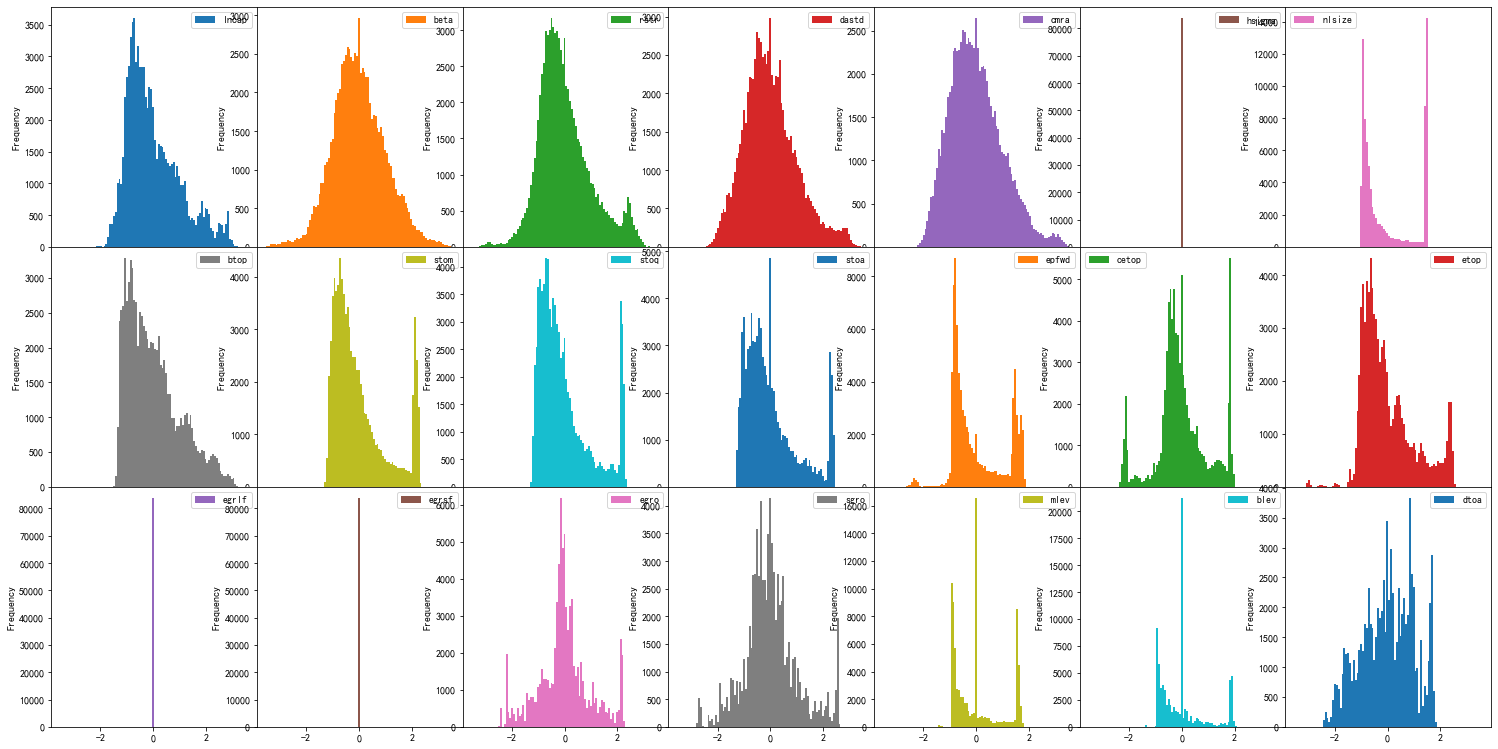

In [72]:
x.loc[:,list(f1)].plot.hist(figsize=(20,10),bins=100,subplots=True,sharex=True,sharey=False,layout=(3,7))
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

### ‰∏ÄÁ∫ßÂõ†Â≠êÂêàÊàê

In [73]:
list(f0)

['size',
 'beta',
 'momentum',
 'volatility',
 'midcapitalization',
 'booktoprice',
 'liquidity',
 'earning',
 'growth',
 'leverage']

In [74]:
x[f0.size]=x[f1.lncap]
x[f0.beta]=x[f1.beta]
x[f0.momentum]=x[f1.rstr]
x[f0.volatility]=x.loc[:,[f1.dastd,f1.cmra,f1.hsigma]].mean(axis=1)
x[f0.midcapitalization]=x[f1.nlsize]
x[f0.booktoprice]=x[f1.btop]
x[f0.liquidity]=x.loc[:,[f1.stom,f1.stoq,f1.stoa]].mean(axis=1)
x[f0.earning]=x.loc[:,[f1.epfwd,f1.cetop,f1.etop]].mean(axis=1)
x[f0.growth]=x.loc[:,[f1.egrlf,f1.egrsf,f1.egro,f1.sgro]].mean(axis=1)
x[f0.leverage]=x.loc[:,[f1.mlev,f1.blev,f1.dtoa]].mean(axis=1)

### ‰∏ÄÁ∫ßÂõ†Â≠êÊ†áÂáÜÂåñ

In [75]:
%%time
# ‰∫åÁ∫ßÂõ†Â≠êÊ†áÂáÜÂåñ
x.loc[:,list(f0)]=(
    x.loc[:,list(f0)]
    .groupby('date')
    .apply(lambda i:i.apply(lambda j:f_z_score(f_mad(j)),axis=0))
)

Wall time: 12.5 s


In [76]:
len(list(f0))

10

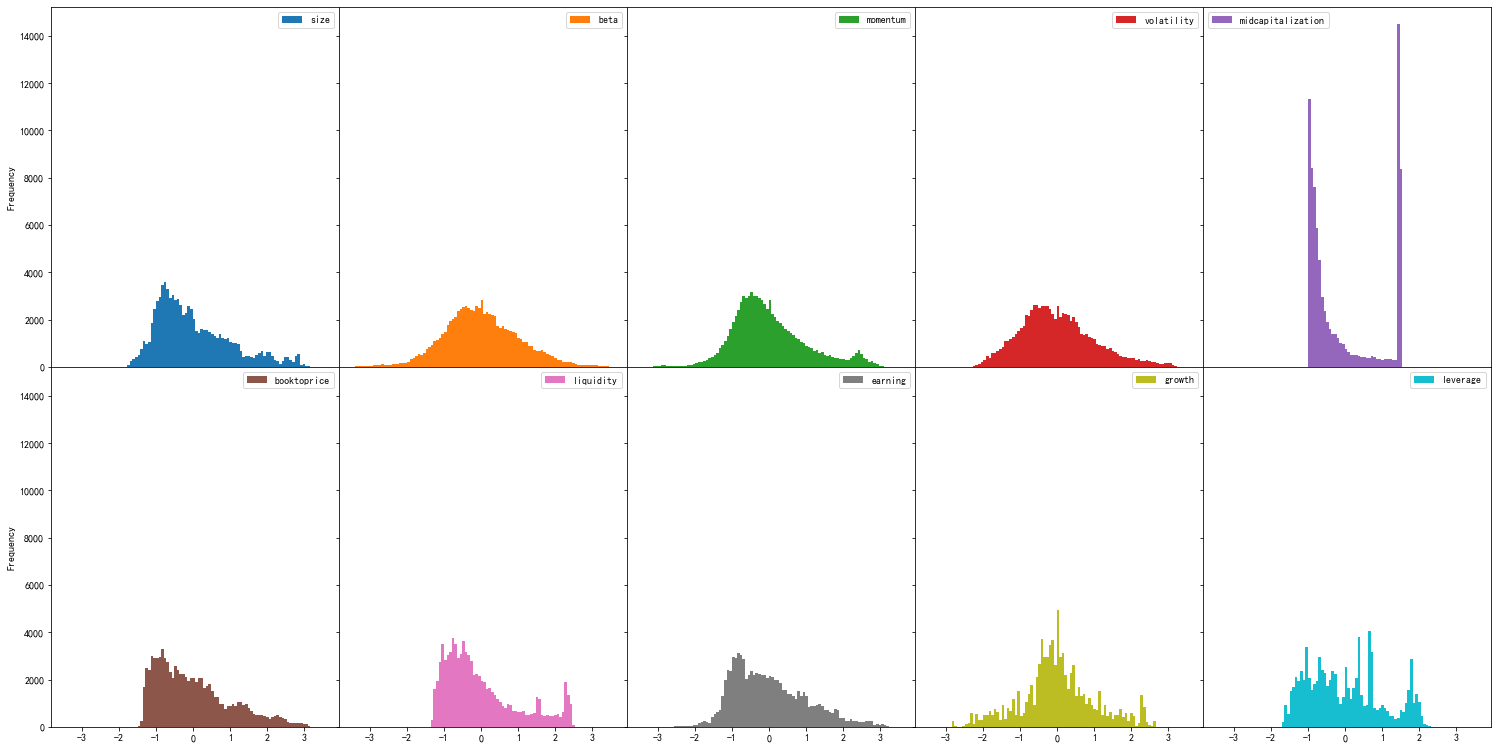

In [77]:
x.loc[:,list(f0)].plot.hist(figsize=(20,10),bins=100,subplots=True,sharex=True,sharey=True,layout=(2,5))
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

### ‰º∞ËÆ°Âõ†Â≠êÊî∂ÁõäÁéá

#### Âõ†Â≠êÂéÜÂè≤Êî∂ÁõäÁéáÂ∫èÂàó

$F=\begin{bmatrix}\tilde{f_1^1}&\dots&\tilde{f_K^1}\\\vdots&\ddots&\vdots\\\tilde{f_1^T}&\dots&\tilde{f_K^T}\end{bmatrix}$

In [78]:
%%time
def _f(x:pd.DataFrame)->pd.DataFrame:
    y=stm.OLS(
        endog=x.loc[:,a.columns],
        exog =x.loc[:,b.columns.to_list()+list(f0)] 
    ).fit().params[:]
    return y
y=x.groupby('date').apply(_f)# .loc[('2019-03-04',slice(None)),:]

d:\pp\miniconda3\envs\pyqi\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


Wall time: 1.89 s


In [79]:
y.head()

‰∫§ÈÄöËøêËæì      ‰ºëÈó≤ÊúçÂä°        ‰º†Â™í      ÂÖ¨Áî®‰∫ã‰∏ö      ÂÜúÊûóÁâßÊ∏î        ÂåñÂ∑•  \
date                                                                     
2019-03-04  0.015088  0.007486  0.006056  0.034413  0.048902  0.008252   
2019-03-05  0.010198 -0.003247  0.012169  0.021546  0.010945  0.007059   
2019-03-06  0.016567  0.007120  0.014300  0.020106 -0.012053  0.025514   
2019-03-07  0.002670  0.017875 -0.014521 -0.005466 -0.055520 -0.006832   
2019-03-08 -0.054441 -0.057049 -0.074120 -0.054633 -0.032336 -0.055403   

                ÂåªËçØÁîüÁâ©      ÂïÜ‰∏öË¥∏Êòì      ÂõΩÈò≤ÂÜõÂ∑•      ÂÆ∂Áî®ÁîµÂô®  ...      size      beta  \
date                                                ...                       
2019-03-04  0.019367  0.024997  0.017304  0.035694  ...  0.003004 -0.001680   
2019-03-05  0.013383  0.009905  0.014930  0.025761  ...  0.001160 -0.004091   
2019-03-06  0.009569  0.007440  0.001173  0.005364  ...  0.000819 -0.002096   
2019-03-07 -0.000822 -0.000629 -0.008554 -0.016979  ...  0.002569 -0.011003   
2019-03-08 -0.026728 -0.041726 -0.054795 -0.037680  ...  0.001531 -0.021537   

            momentum  volatility  midcapitalization  booktoprice  liquidity  \
date                                                                          
2019-03-04  0.002310    0.005050          -0.006353    -0.000830  -0.000209   
2019-03-05  0.004689    0.007786          -0.004903    -0.000440  -0.000529   
2019-03-06  0.005604    0.003453          -0.005531     0.000029   0.001977   
2019-03-07  0.010544    0.006672          -0.009653     0.004417  -0.002460   
2019-03-08  0.005252    0.001801           0.003394    -0.005837   0.001046   

             earning    growth  leverage  
date                                      
2019-03-04 -0.000572 -0.000514  0.000684  
2019-03-05  0.000094  0.000501  0.001526  
2019-03-06 -0.001141 -0.000464  0.002807  
2019-03-07 -0.004791 -0.000489  0.000546  
2019-03-08 -0.002550  0.000760 -0.002544  

[5 rows x 38 columns]

Wall time: 1.89 s


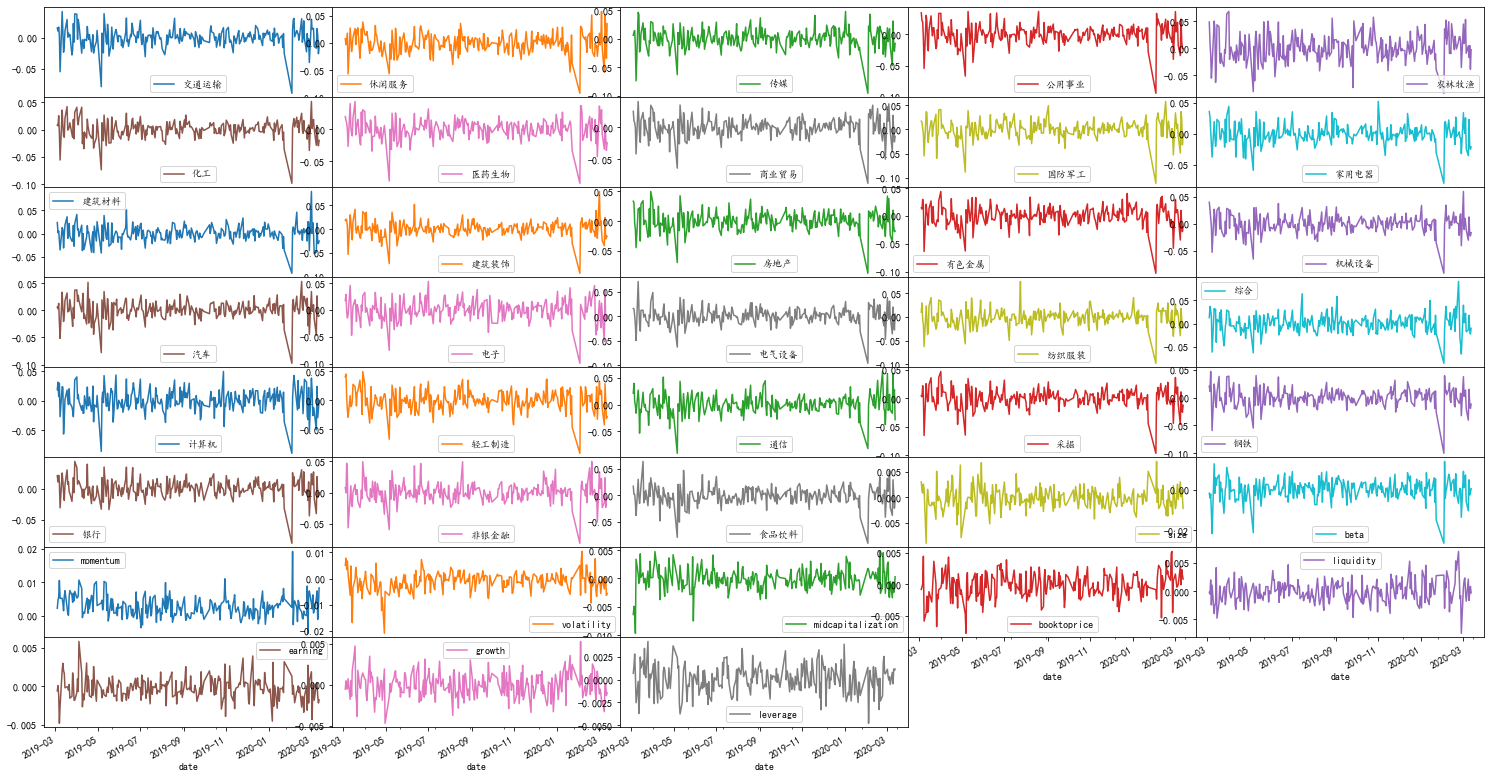

In [80]:
%%time
y.plot(figsize=(20,10),subplots=True,sharey=False,sharex=True,layout=(-1,5))
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

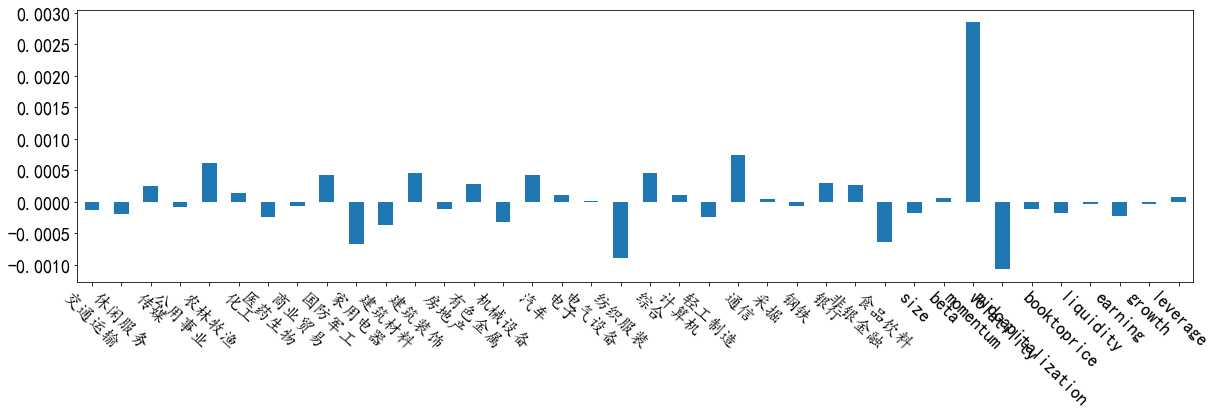

In [81]:
y.mean().plot.bar(figsize=(20,5),fontsize=18)
plt.xticks(rotation=-45)

#### ÁÆÄÂçïÂπ≥ÂùáÊ≥ï

$\large\tilde{f_k^{T+1}}=\frac{\sum_{t=T-N+1}^{T}{\tilde{f_k^{t}}}}{N}$

In [82]:
z=y.shift(1).rolling(window=20,min_periods=0).apply(lambda i:i.mean())# Êï¥‰ΩìÂêëÂâçÁßªÂä®‰∏ÄÊ≠•

#### Âä†ÊùÉÁßªÂä®Âπ≥Âùá

In [83]:
z=y.shift(1).rolling(window=20,min_periods=1).apply(lambda i:ab.WMA(i,timeperiod=20)[-1])# Êï¥‰ΩìÂêëÂâçÁßªÂä®‰∏ÄÊ≠•

#### Êó∂Èó¥Â∫èÂàóÈ¢ÑÊµãÊ≥ï

In [84]:
def tsplot(y, lags=30, figsize=(8, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Êó∂Èó¥Â∫èÂàóÂàÜÊûê')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05,title='Ëá™Áõ∏ÂÖ≥Á≥ªÊï∞')
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05,title='ÂÅèËá™Áõ∏ÂÖ≥Á≥ªÊï∞')
        stm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
        plt.tight_layout()
    return

##### Êó∂Â∫èÂàÜÊûê

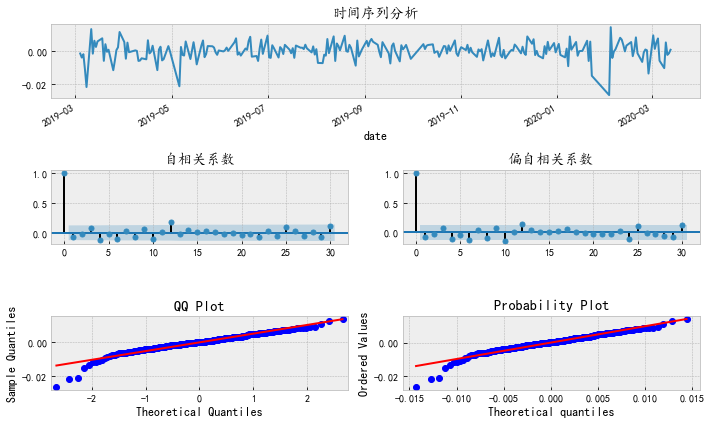

In [85]:
tsplot(y=y.loc[:,f0.beta],figsize=(10,6))

##### ÂèÇÊï∞ÂØª‰ºò(p,q)

In [86]:
%%time
z=stm.tsa.arma_order_select_ic(y=y.loc[:,f0.beta],max_ar=3,max_ma=3,ic='aic',trend='nc',)

Wall time: 1.29 s


In [87]:
z.aic_min_order

(1, 2)

##### Ê®°ÂûãËÆ≠ÁªÉ

In [98]:
m=smt.ARMA(endog=y.loc[:,f0.beta],order=z.aic_min_order).fit(method='mle', trend='nc',)

d:\pp\miniconda3\envs\pyqi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [99]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   beta   No. Observations:                  252
Model:                     ARMA(1, 2)   Log Likelihood                 973.692
Method:                           mle   S.D. of innovations              0.005
Date:                Sun, 16 Aug 2020   AIC                          -1939.385
Time:                        10:53:50   BIC                          -1925.267
Sample:                             0   HQIC                         -1933.704
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.beta    -0.8276      0.081    -10.241      0.000      -0.986      -0.669
ma.L1.beta     0.7912      0.094      8.390      0.000       0.606       0.976
ma.L2.beta    -0.1297      0.064     -2.032      0.042      -0.255      -0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2083           +0.0000j            1.2083            0.5000
MA.1           -1.0746           +0.0000j            1.0746            0.5000
MA.2            7.1739           +0.0000j            7.1739            0.0000
-----------------------------------------------------------------------------
"""

##### Ê®°ÂûãÊÆãÂ∑ÆÁöÑÊó∂Â∫èÂàÜÊûê

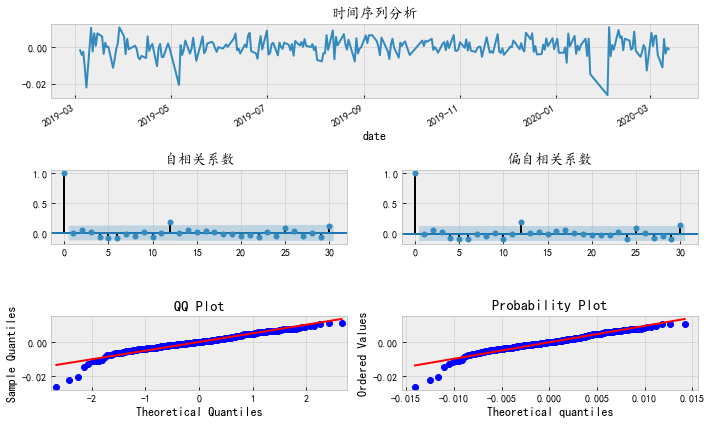

In [100]:
tsplot(y=m.resid,figsize=(10,6))

##### ÂéÜÂè≤È¢ÑÊµã

In [102]:
m.predict()#Á¨¨‰∏ÄÊ¨°ËøêË°åÂá∫ÈîôÔºåÁ¨¨‰∫åÊ¨°‰∏çÂá∫Èîô

date
2019-03-04    0.000000
2019-03-05    0.000096
2019-03-06    0.000390
2019-03-07    0.000347
2019-03-08    0.000642
                ...   
2020-03-09    0.000764
2020-03-10    0.000315
2020-03-11    0.001014
2020-03-12   -0.001302
2020-03-13    0.001543
Length: 252, dtype: float64

##### Êú™Êù•È¢ÑÊµã

In [103]:
m.forecast(steps=10)[0]

array([-0.00120973,  0.00113226, -0.00093707,  0.00077552, -0.00064183,
        0.00053118, -0.00043961,  0.00036382, -0.0003011 ,  0.0002492 ])

In [104]:
m.predict(start=0,end=261)[-20:]

d:\pp\miniconda3\envs\pyqi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


242    0.001151
243    0.000420
244   -0.001395
245    0.000847
246   -0.001740
247    0.000764
248    0.000315
249    0.001014
250   -0.001302
251    0.001543
252   -0.001210
253    0.001132
254   -0.000937
255    0.000776
256   -0.000642
257    0.000531
258   -0.000440
259    0.000364
260   -0.000301
261    0.000249
dtype: float64

##### Â∑•Á®ãÁªÑË£Ö

In [105]:
%%time
def _f(y:pd.Series)->pd.Series:
    a=stm.tsa.arma_order_select_ic(y=y.values,max_ar=3,max_ma=3,ic='aic',trend='nc',)
    b=smt.ARMA(endog=y.values,order=a.aic_min_order).fit(method='mle', trend='nc',)
    return pd.Series(b.predict(start=0,end=len(y)-1+20))
z=y.apply(_f,axis=0)

d:\pp\miniconda3\envs\pyqi\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
d:\pp\miniconda3\envs\pyqi\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
d:\pp\miniconda3\envs\pyqi\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
d:\pp\miniconda3\envs\pyqi\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
d:\pp\miniconda3\envs\pyqi\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
d:\pp\mini

Wall time: 1min 24s


Wall time: 1.39 s


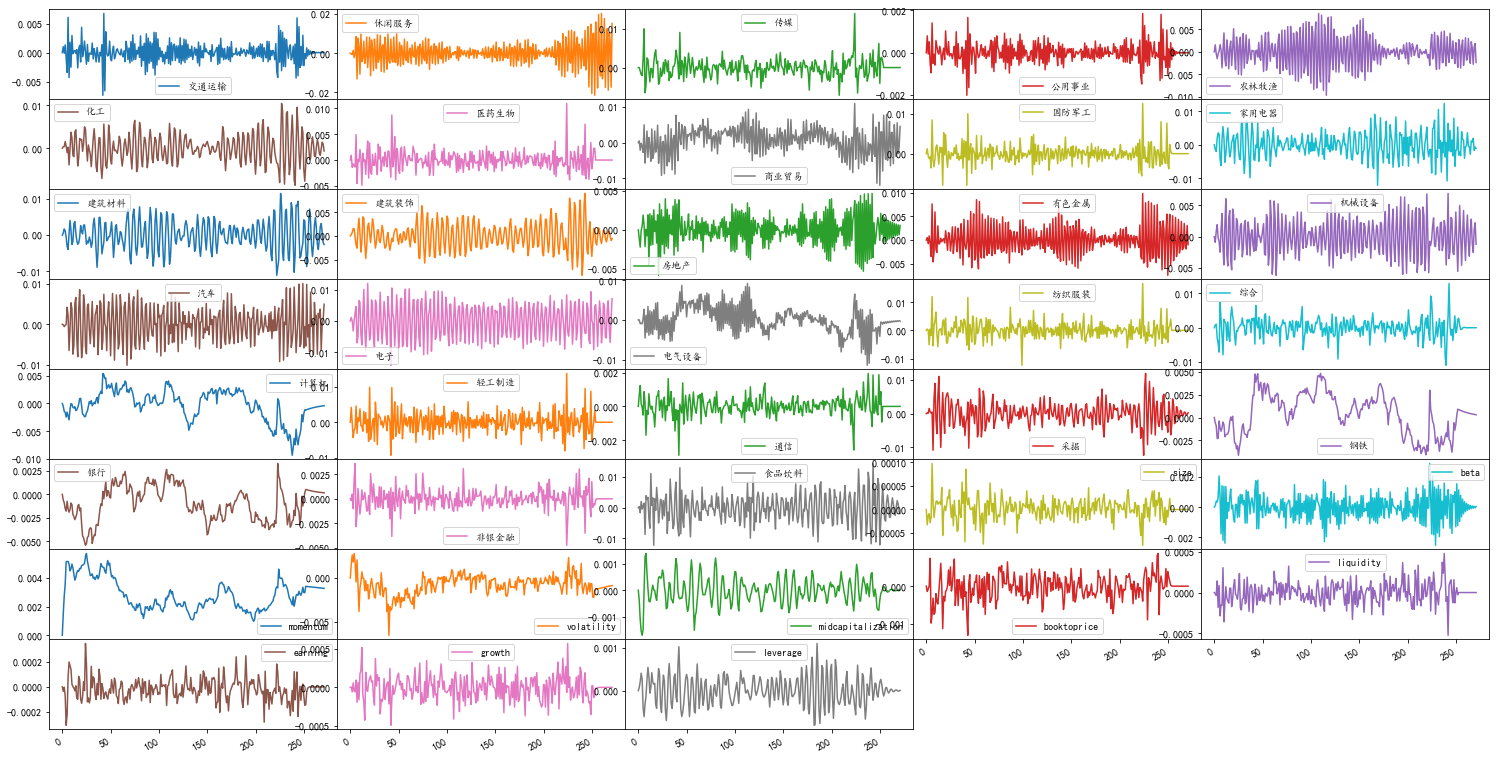

In [106]:
%%time
z.plot(figsize=(20,10),subplots=True,sharey=False,sharex=True,layout=(-1,5))
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

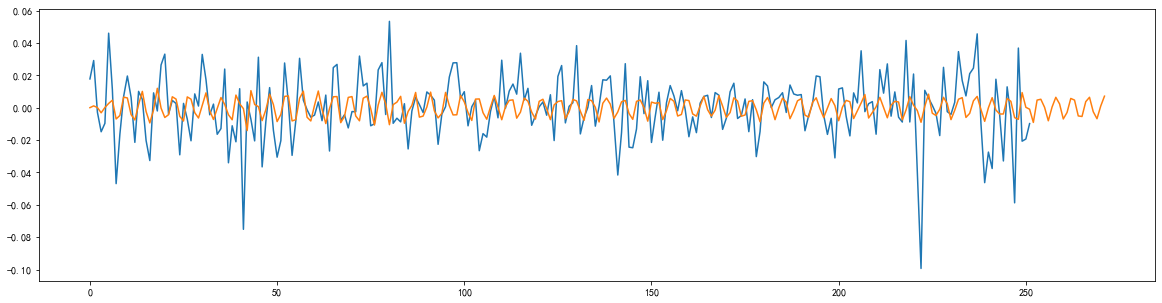

In [107]:
plt.figure(figsize=(20,5))
ax=plt.gca()
n=16
y.reset_index(drop=True)[y.columns[n]].plot(ax=ax)
z[y.columns[n]].plot(ax=ax)

#### Êª§Ê≥¢Ê≥ïÊèêÂèñË∂ãÂäøÈ°π

ÂéüÁêÜÔºö
1. ÈááÁî®HPÊª§Ê≥¢Ê≥ïÂ∞ÜÂèòÂåñ‰∏çÂÆöÁöÑÊó∂Èó¥Â∫èÂàóÊï∞ÊçÆÂàÜ‰∏∫ÔºöÂë®ÊúüÊ≥¢Âä®Êï∞ÊçÆ+Ë∂ãÂäøË¶ÅÁ¥†Êï∞ÊçÆÔºõ
2. Ëé∑ÂæóË∂ãÂäøË¶ÅÁ¥†Êï∞ÊçÆ‰πãÂêéÔºåÊ±ÇÂ∑ÆÂàÜÔºåÊ±ÇÂπ≥ÂùáÂç≥‰∏∫È¢ÑÊúüÂõ†Â≠êÊî∂ÁõäÁéá

ÂÖ¨ÂºèÔºö
>$\large minimize:f(g_t)=sum_{t=1}^T{(y_t-g_t)}^2+\lambda\sum_{t=3}^T{[g_t-g_{t-2}]}^2$

##### Ê°à‰æã

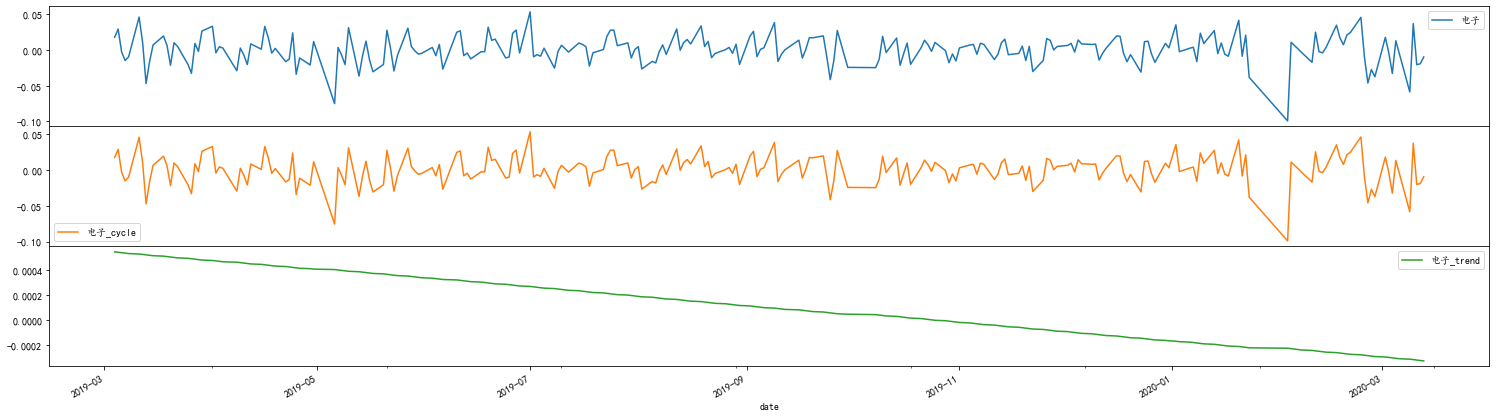

In [108]:
z=y[y.columns[16]]
pd.DataFrame(list([z]+list(stm.tsa.filters.hpfilter(x=z,lamb=1600*(60**4))))).T.plot(figsize=(20,5),subplots=True)
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

##### Â∑•Á®ãÁªÑË£Ö

In [109]:
def _f(y:pd.Series)->pd.Series:
    return stm.tsa.filters.hpfilter(x=y,lamb=1600*(60**4))[1]
    pass
z=y.apply(_f)

Wall time: 1.49 s


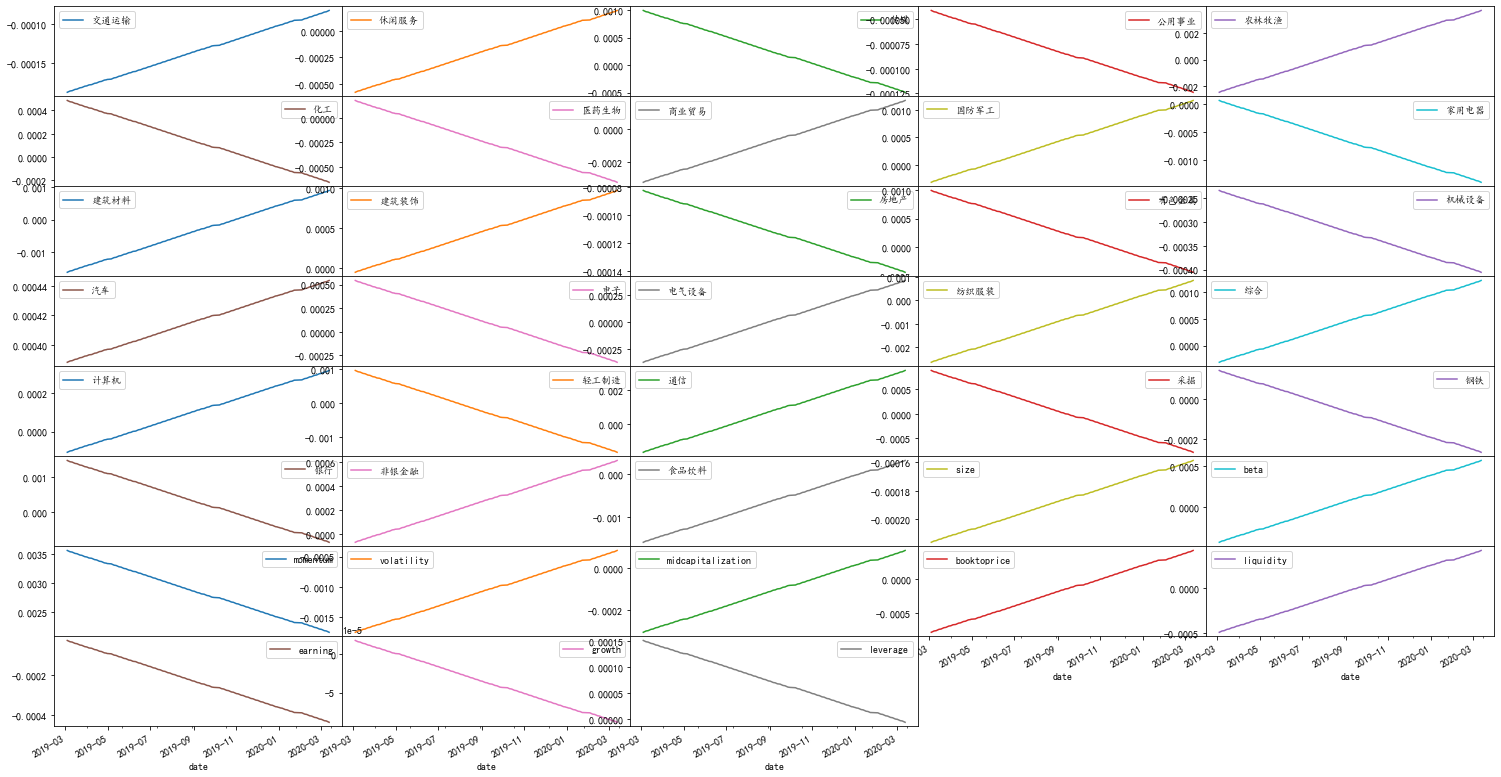

In [110]:
%%time
z.plot(figsize=(20,10),subplots=True,sharey=False,sharex=True,layout=(-1,5))
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

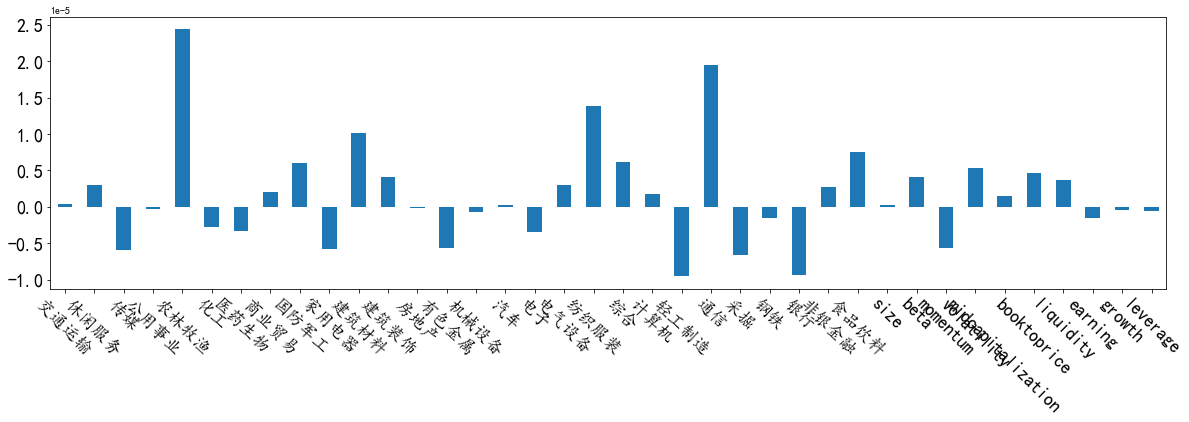

In [111]:
z.diff().mean().plot.bar(figsize=(20,5),fontsize=18)
plt.xticks(rotation=-45)

#### ËÆ°ÁÆóÊ†áÁöÑËµÑ‰∫ßÈ¢ÑÊúüÊî∂ÁõäÁéá

ÂÖ¨ÂºèÔºö
>$\large r=Xf\\
\large \tilde{r_j}=\sum_{k=1}^K{X_{jk}\times \tilde{f_k}}
$

##### ‰º∞ÁÆóT+1Âõ†Â≠êÈ¢ÑÊúüÊî∂ÁõäÁéá

In [112]:
x1=z.diff().mean()

##### ‰º∞ÁÆóT+1ÊúüÂõ†Â≠êËΩΩËç∑Áü©Èòµ

In [113]:
x2=x.loc[:,b.columns.to_list()+list(f0)].groupby('instrument').apply(lambda i:i.iloc[-20:].mean())

##### ‰º∞ÁÆó

In [114]:
x1.shape,x2.shape

((38,), (335, 38))

In [115]:
y=x2@x1

In [116]:
y

instrument
000001.SZA   -2.801215e-06
000002.SZA   -6.732537e-06
000063.SZA    1.983672e-05
000069.SZA   -9.395643e-07
000100.SZA    2.564966e-06
                  ...     
603833.SHA   -1.538898e-05
603858.SHA   -8.184967e-06
603899.SHA   -1.671688e-05
603986.SHA    4.869647e-06
603993.SHA    1.992268e-06
Length: 335, dtype: float64

## È£éÈô©Ê®°Âûã

### Â§öÂõ†Â≠êÊ®°ÂûãÁöÑÈ£éÈô©ÂàÜËß£

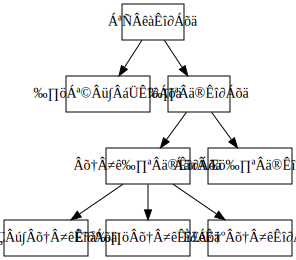

In [117]:
g=gz.Digraph()
g.attr('node', shape='box')
g.attr(rankdir='TB', )
g.edges([
    ('ÁªÑÂêàÊî∂Áõä','‰∏öÁª©Âü∫ÂáÜÊî∂Áõä'),
    ('ÁªÑÂêàÊî∂Áõä','‰∏ªÂä®Êî∂Áõä'),
    ('‰∏ªÂä®Êî∂Áõä','Âõ†Â≠ê‰∏ªÂä®Êî∂Áõä'),
    ('Âõ†Â≠ê‰∏ªÂä®Êî∂Áõä','Â∏ÇÂú∫Âõ†Â≠êÊî∂Áõä'),
    ('Âõ†Â≠ê‰∏ªÂä®Êî∂Áõä','Ë°å‰∏öÂõ†Â≠êÊî∂Áõä'),
    ('Âõ†Â≠ê‰∏ªÂä®Êî∂Áõä','È£éÊ†ºÂõ†Â≠êÊî∂Áõä'),
    ('‰∏ªÂä®Êî∂Áõä','ÁâπÂÆö‰∏ªÂä®Êî∂Áõä'),
])
g

### Â∏ÇÂú∫È£éÈô©ÁªìÊûÑ

$\Large V{i,j}=\sum_{k1,k2=1}^{K}{X_{i,k1}F_{k1,k2}X_{j,k2}+\Delta_{i,j}}$
1. $V{i,j}$:ËÇ°Á•®ùëñÂíåËÇ°Á•®ùëóÁöÑÂçèÊñπÂ∑Æ;
2. $X_{i,k1}$:ËÇ°Á•®ùëñÂØπÂõ†Â≠êùëò1ÁöÑÊö¥Èú≤Â∫¶ÔºàÂõ†Â≠êËΩΩËç∑Ôºâ
3. $F_{k1,k2}$:Âõ†Â≠êùëò1ÂíåÂõ†Â≠êùëò2 ‰πãÈó¥ÁöÑÊî∂ÁõäÁéáÂçèÊñπÂ∑Æ
4. $\Delta_{i,j}$:ËÇ°Á•®ùëñÂíåËÇ°Á•®ùëó‰πãÈó¥ÊÆãÂ∑ÆÁöÑÂçèÊñπÂ∑ÆÔºåùëñ ‚â† ùëóÊó∂‰∏∫ 0

### ÁªÑÂêàP
‰∏ÄËà¨ÂÅáËÆæÔºö
1. ÁâπÂÆöÊî∂Áõä$\mu$‰∏éÂõ†Â≠êÊî∂Áõä$b$ÊòØ‰∏çÁõ∏ÂÖ≥ÁöÑÔºå‰πüÂ∞±ÊòØËØ¥ÔºåÂØπÊâÄÊúâÁöÑ$n$‰∏é$k$ÔºåÊúâ$Cov\{\mu_n,b_k\}=0$;
2. Â¶ÇÊûú$m\neq n$ÔºåÈÇ£‰πàËÇ°Á•®$m$ÁöÑÁâπÂÆöÊî∂Áõä$\mu_m$‰∏éËÇ°Á•®$n$ÁöÑÁâπÂÆöÊî∂Áõä$\mu_n$‰πãÈó¥ÁöÑÂçèÊñπÂ∑Æ‰∏∫Èõ∂Ôºå‰πüÂ∞±ÊòØËØ¥ÔºåÂ¶ÇÊûú$m\neq n$ÔºåÊúâ$Cov\{\mu_n,\mu_m\}=0$ÊàêÁ´ã„ÄÇ

ÈÇ£‰πàÔºö
1. Âõ†Â≠êÊö¥ÊºèÂ∫¶Ôºö$x_p=X^Th_p$
2. $V=XFX^T+\Delta$
2. ÁªÑÂêàùëÉÁöÑÊñπÂ∑ÆÔºö$\delta_p^2=x_p^TFx_p+h_p^T\Delta h_p=h_p^TVh_p$

ÂÖ∂‰∏≠Ôºö
$F$ÊòØ‰∏Ä‰∏™‰ª£Ë°®Âõ†Â≠êÊî∂ÁõäÁöÑ$K\times K$Èò∂ÂçèÊñπÂ∑ÆÁü©ÈòµÔºå$\Delta$ÊòØ‰∏Ä‰∏™‰ª£Ë°®ÁâπÂÆöÊñπÂ∑ÆÁöÑ$N\times N$Èò∂ÂØπËßíÁü©Èòµ„ÄÇ

### Ê±ÇËß£ÂêÑÊúüÂõ†Â≠êÊî∂ÁõäÁéá

In [118]:
%%time
def _f(x:pd.DataFrame)->pd.DataFrame:
    y=stm.OLS(
        endog=x.loc[:,a.columns],
        exog =x.loc[:,b.columns.to_list()+list(f0)] 
    ).fit().params[:]
    return y
y=x.groupby('date').apply(_f)# .loc[('2019-03-04',slice(None)),:]

d:\pp\miniconda3\envs\pyqi\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


Wall time: 2.08 s


### Âõ†Â≠êÊî∂ÁõäÁéáÁöÑÂçèÊñπÂ∑ÆÁü©Èòµ

In [119]:
xf=y.cov()

### ÂΩìÊúüÂõ†Â≠êÁü©Èòµ

In [120]:
# ÂΩìÂâçtÊúü
xt=y.index[-1]

In [121]:
# ÂΩìÂâçtÊúüÁöÑÊàêÂàÜËÇ°
xc=h5['obj_weight']
xc=xc.loc[xc.date==xt,:]['instrument'].to_list()
assert len(xc)==300

In [122]:
# ÂΩìÊúüÂõ†Â≠êÁü©Èòµ
xx=x.loc[(xt,xc),b.columns.to_list()+list(f0)]

In [123]:
# ÂΩìÊúüÊúâÂõ†Â≠êÁöÑÊàêÂàÜËÇ°ÂàóË°®
xc=[i[1] for i in xx.index]

### ÂΩìÊúüÂõ†Â≠êÊî∂Áõä

In [124]:
xe=y.loc[xt,:]

### ÊÆãÂ∑ÆÈ£éÈô©ÁöÑ‰º∞ËÆ°

In [125]:
%%time
def _f(x:pd.DataFrame)->pd.Series:
    y=stm.OLS(
        endog=x.loc[:,a.columns],
        exog=x.loc[:,b.columns.to_list()+list(f0)],
    ).fit().resid
    return y
    pass
y=x.groupby('date').apply(_f)

Wall time: 1.96 s


In [126]:
xd=np.diag(y.unstack(2).droplevel(0)[xc].var())

In [127]:
xd.shape

(298, 298)

## ‰ºòÂåñÊ®°Âûã

### ‰∫åÊ¨°ËßÑÂàí

$\large\underset{H}{min}(\frac{1}{2}H^TQH+H^Tc)\\
s.t.\ \ A^TH\leq b
$

### Êî∂ÁõäÁõÆÊ†áÂíåÈ£éÈô©ÁõÆÊ†á

ÊéßÂà∂È£éÈô©ÔºåÊî∂ÁõäÊúÄÂ§ßÂåñÔºö
>$\underset{h_j}{max}\sum_{j=1}^N{(\tilde{r_j^{T+1}}h_j)}\\
s.t.\ \ h_p^TVh_p\leq \sigma^2\\
\sum_{j=1}^N{h_j}=1,h_j\geq 0,j=1,\dots,N$

ÊéßÂà∂Êî∂ÁõäÔºåÈ£éÈô©ÊúÄÂ∞èÂåñÔºö
>$\underset{h_j}{min}(h_p^TVh_p)\\
s.t.\ \ \sum_{j=1}^N{(\tilde{r_j^{T+1}}h_j)}\geq r\\
\sum_{j=1}^N{h_j}=1,h_j\geq 0,j=1,\dots,N$

### ‰∏™ËÇ°‰∏ä‰∏ãÈôêÁ∫¶Êùü

ÁªÑÂêàPÂ≠òÂú®‰∏öÁª©Âü∫ÂáÜB:
1. $h_{pa}=h_p-h_b$
2. $x_{pa}=X^Th_{pa}$
3. $\delta_{pa}^2=x_{pa}^TFx_{pa}+h_{pa}^T\Delta h_{pa}=h_{pa}^TVh_{pa}$

ÊéßÂà∂È£éÈô©ÔºåÊî∂ÁõäÊúÄÂ§ßÂåñÔºö
>$\underset{h_j}{max}\sum_{j=1}^N{(\tilde{r_j^{T+1}}h_{paj})}\\
s.t.\ \ h_{pa}^TVh_{pa}\leq \sigma^2\\
\sum_{j=1}^N{h_{{paj}}}=0,h_j^{upper}\geq h_{paj}\geq -h_{bj},j=1,\dots,N$

### Ë°å‰∏öÊùÉÈáçÁ∫¶Êùü

1. ÈÄöËøáËÇ°ÊåáÊúüË¥ßÂØπÂÜ≤ÁªÑÂêàÁöÑÂ∏ÇÂú∫È£éÈô©ÔºàÂ∏ÇÂÄºÂØπÂÜ≤Ôºâ
2. ÈÄöËøáË°å‰∏ö‰∏≠ÊÄßÂØπÂÜ≤ÁªÑÂêàÁöÑË°å‰∏öÈ£éÈô©ÔºàË°å‰∏ö‰∏≠ÊÄßÔºâ

Ë°å‰∏ö‰∏≠ÊÄßÔºöÂØπ‰∫éÊâÄÊúâËÇ°Á•®ÁªÑÊàêÁöÑÂìëÂèòÈáèÁü©ÈòµSÔºö
>$S=\begin{bmatrix}
 S_{11}& \dots & S_{1s}\\ 
 \vdots& \ddots &\vdots \\
 S_{N1}& \dots & S_{Ns}\\ 
\end{bmatrix}
$

Ë¶ÅÊ±ÇÔºö
>$\sum_{j=1}^N{(h_{paj}s_{ji})}=0$

### Âõ†Â≠êÊö¥ÊºèÁ∫¶Êùü

>$|\sum_{j=1}^N{(h_{paj}x_{jk})}|\leq x_k$

### ÊúÄÁªàÁöÑ‰ºòÂåñÊù°‰ª∂

ÊéßÂà∂È£éÈô©ÔºåÊî∂ÁõäÊúÄÂ§ßÂåñÔºö
>$\underset{h_j}{max}\sum_{j=1}^N{(\tilde{r_j^{T+1}}h_{paj})}\\
s.t.\ \ h_{pa}^TVh_{pa}\leq \sigma^2\\
\sum_{j=1}^N{h_{{paj}}}=0,h_j^{upper}\geq h_{paj}\geq -h_{bj},j=1,\dots,N\\
\sum_{j=1}^N{(h_{paj}s_{ji})}=0\\
|\sum_{j=1}^N{(h_{paj}x_{jk})}|\leq x_k\\
$

### Â∑•Á®ãÂåñÂÆûÁé∞

#### ‰ºòÂåñ

In [155]:
# tÊúüÊàêÂàÜËÇ°ÊùÉÈáç
x1=h5['obj_weight']
x1=x1.loc[x1.date==xt,:]
x1.head()

date  instrument    weight
464000 2020-03-13  002773.SZA  0.000692
464001 2020-03-13  002739.SZA  0.001139
464002 2020-03-13  002736.SZA  0.002223
464003 2020-03-13  600048.SHA  0.008821
464004 2020-03-13  002673.SZA  0.001248

In [156]:
# tÊúüË°å‰∏öÊàêÂàÜËÇ°
x2=h5['obj_cls']
x2=x2.loc[x2.date==xt,:]
x2.head()

date  instrument industry_sw_level1
83780 2020-03-13  600390.SHA             490000
83781 2020-03-13  600383.SHA             430000
83782 2020-03-13  600398.SHA             350000
83783 2020-03-13  600406.SHA             630000
83784 2020-03-13  600415.SHA             450000

In [157]:
# Ë°å‰∏ö‰ª£Á†ÅÂíåÂêçÁß∞ÂØπÁÖßË°®
x3=h5['ind_info']
x3.head()

industriesalias industriesname    memo
356        801080.SI             ÁîµÂ≠ê  270000
968        801770.SI             ÈÄö‰ø°  730000
1067       801040.SI             Èí¢ÈìÅ  230000
1084       801180.SI            ÊàøÂú∞‰∫ß  430000
1661       801890.SI           Êú∫Ê¢∞ËÆæÂ§á  640000

In [158]:
# Ê≤™Ê∑±300ÊàêÂàÜËÇ°‰ø°ÊÅØÔºàÊùÉÈáçÂíåË°å‰∏öÂΩíÂ±ûÔºâ
xh=(
    x1
    .merge(right=x2,on='instrument')
    .merge(right=x3,left_on='industry_sw_level1',right_on='memo')
    .set_index('instrument')
    .loc[xc,['industriesname','weight']]
)
xh.weight=xh.weight/xh.weight.sum()
xh.head()

industriesname      weight
instrument                           
000001.SZA             Èì∂Ë°å   0.0107297
000002.SZA            ÊàøÂú∞‰∫ß   0.0131624
000063.SZA             ÈÄö‰ø°   0.0089553
000069.SZA            ÊàøÂú∞‰∫ß  0.00205196
000100.SZA             ÁîµÂ≠ê  0.00560483

In [201]:
# ÂæÖËß£‰ºòÂåñÊùÉÈáç
xw=cp.Variable(len(xc),)

In [270]:
# ‰ºòÂåñÊ±ÇËß£
cp.Problem(
#     objective=cp.Minimize(cp.quad_form(xw,xx@xf@xx.T+xd),),#ÊúÄÂ∞èÂåñÈ£éÈô©
#     objective=cp.Maximize(xw@x.loc[(xt,xc),'s_dq_adjclose'],),# ÊúÄÂ§ßÂåñÊî∂Áõä
    # ÊúÄÂ§ßÂåñÈ£éÈô©Ë∞ÉÊï¥Êî∂Áõä,È£éÈô©Ë∞ÉÊï¥ÂèÇÊï∞ËøáÂ∞èÂàôÁõÆÊ†áÂÅèÈáçË¶Å‰∫éÊî∂ÁõäÁöÑÊúÄÂ§ßÂåñÔºåËøáÂ§ßÂàôÁõÆÊ†áÂÅèÈáç‰∫éÈ£éÈô©ÁöÑÊúÄÂ∞èÂåñ
    objective=cp.Maximize(xw@x.loc[(xt,xc),'s_dq_adjclose']-3e4*cp.quad_form(xw,xx@xf@xx.T+xd),),
    constraints=[
#         xw@x.loc[(xt,xc),'s_dq_adjclose']==0.03112452579082405,# Á∫¶ÊùüÊî∂ÁõäÁõÆÊ†á
        xw>=0,# ‰∏çÂÖÅËÆ∏ÂÅöÁ©∫
        xw<=2.*xh.weight,# ÈôêÂÆöÊùÉÈáçÁöÑÊúÄÂ§ßÂÄº
        cp.sum(xw)==1,# ÂÖÖÂàÜÊäïËµÑ
        (xw-xh.weight)@xx.loc[:,b.columns.to_list()]==0,# Ë°å‰∏ö‰∏≠ÊÄß
        (xw-xh.weight)@xx.loc[:,list(f0)]==0,# È£éÊ†º‰∏≠ÊÄß
    ],
).solve()

-5.418068559480008

In [271]:
# Ê±ÇËß£ÂÄºËµãÂÄº
xh['opt']=xw.value
xh.head()

industriesname      weight           opt
instrument                                         
000001.SZA             Èì∂Ë°å   0.0107297  8.196549e-03
000002.SZA            ÊàøÂú∞‰∫ß   0.0131624  1.623368e-02
000063.SZA             ÈÄö‰ø°   0.0089553  6.878488e-03
000069.SZA            ÊàøÂú∞‰∫ß  0.00205196  3.738754e-22
000100.SZA             ÁîµÂ≠ê  0.00560483  2.625377e-03

#### Âõ†Â≠êÊö¥ÊºèÔºàÂ§¥ÂØ∏Ôºâ

In [272]:
xr=pd.DataFrame(data=xh.values[:,1:].T@xx).T
xr[2]=xr[1]-xr[0]
xr.head()

0           1            2
‰∫§ÈÄöËøêËæì   0.0283888   0.0283888  1.04083e-17
‰ºëÈó≤ÊúçÂä°  0.00773595  0.00773595  2.60209e-18
‰º†Â™í     0.0248881   0.0248881  6.93889e-18
ÂÖ¨Áî®‰∫ã‰∏ö   0.0242659   0.0242659  1.38778e-17
ÂÜúÊûóÁâßÊ∏î   0.0236377   0.0236377  3.46945e-18

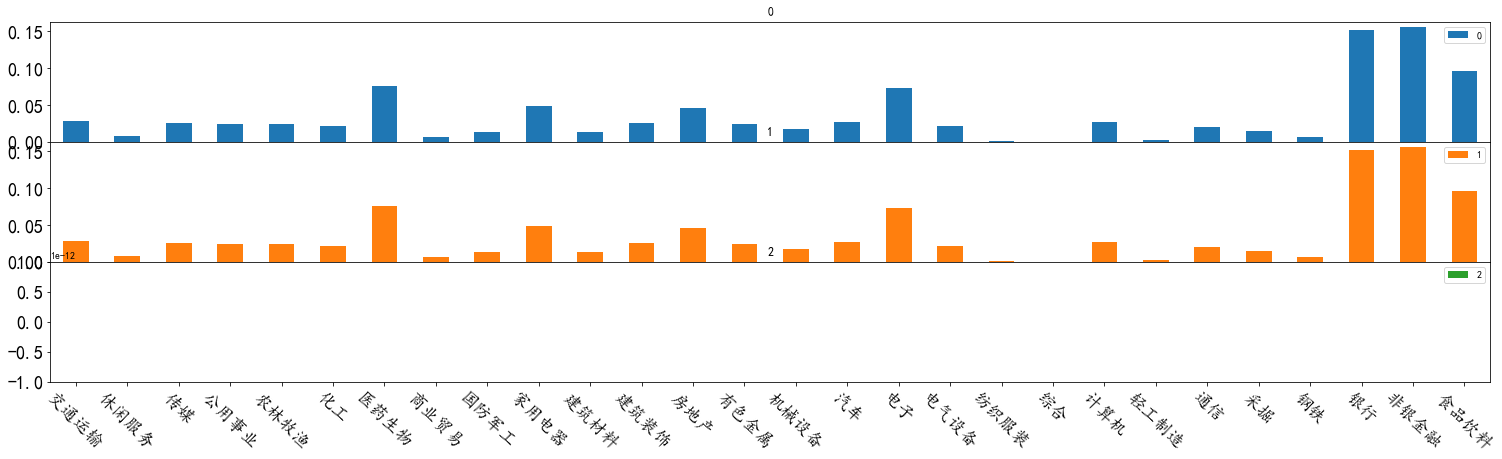

In [273]:
# Ë°å‰∏öÂõ†Â≠êÊö¥Êºè
xr.loc[b.columns.to_list()].plot.bar(figsize=(20,5),subplots=True,fontsize=18)
plt.xticks(rotation=-45)
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

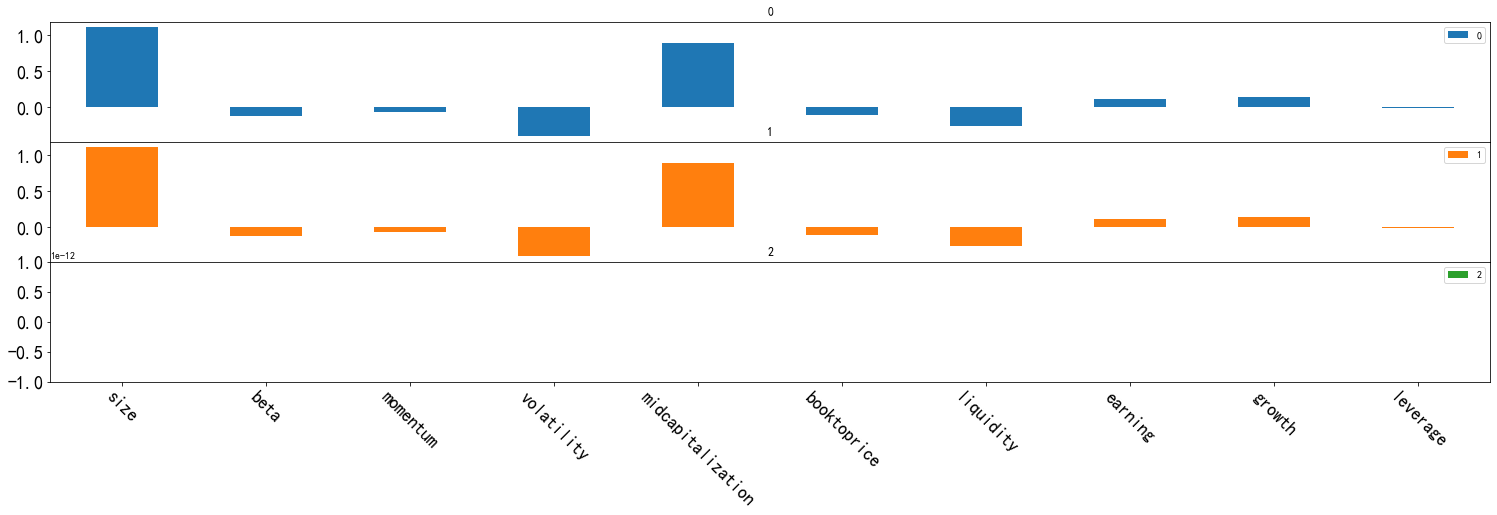

In [274]:
# È£éÊ†ºÂõ†Â≠êÊö¥Êºè
xr.loc[list(f0)].plot.bar(figsize=(20,5),subplots=True,fontsize=18)
plt.xticks(rotation=-45)
plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)

#### ÊùÉÈáçÂàÜÂ∏É

##### ‰∏™ËÇ°ÊùÉÈáç

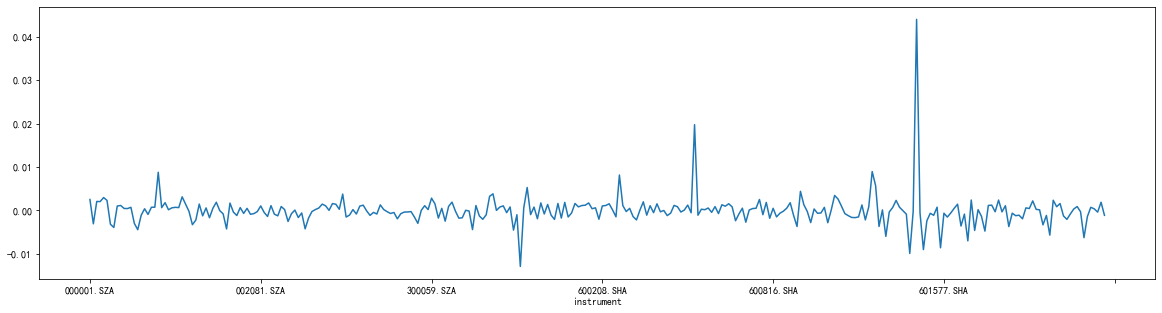

In [277]:
(xh.weight-xh.opt).plot(figsize=(20,5))

##### Ë°å‰∏öÊùÉÈáç

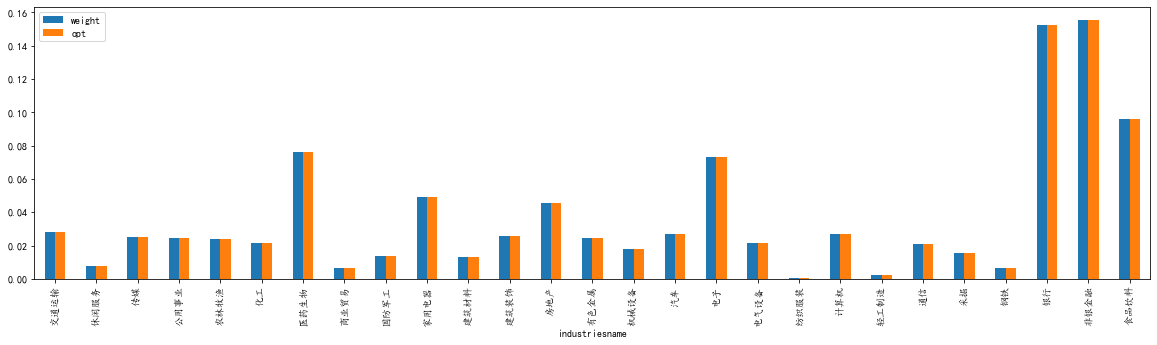

In [278]:
xh.groupby('industriesname').agg({'weight':'sum','opt':'sum'}).plot.bar(figsize=(20,5))

#### Êî∂ÁõäÂàÜËß£(ÂΩíÂõ†)

##### ÁªÑÂêàÊî∂Áõä

In [279]:
xh.loc[:,['weight','opt']].T.values@x.loc[(xt,xc),:]['s_dq_adjclose']

array([-0.014348796604745941, -0.011666939346091362], dtype=object)

##### Âõ†Â≠êË¥°ÁåÆ

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

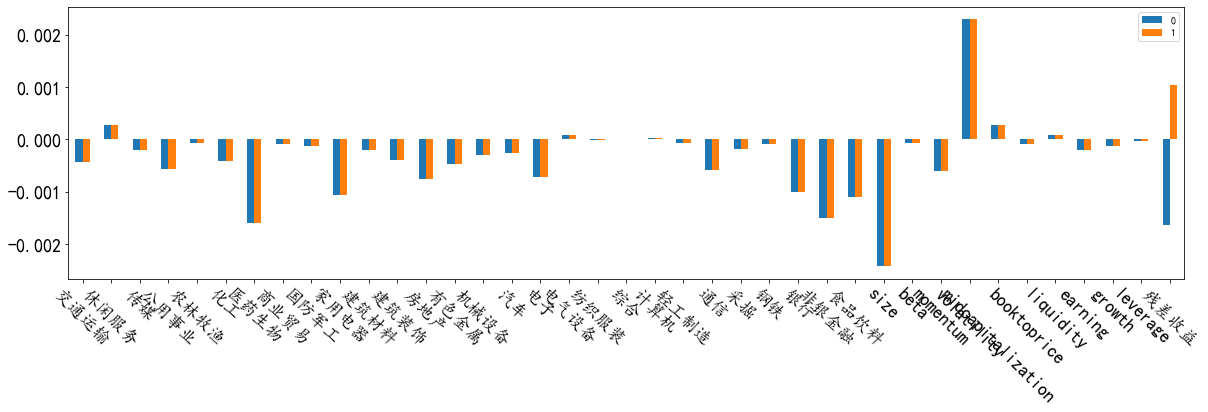

In [280]:
pd.concat(objs=(
    ((xh.loc[:,['weight','opt']].T.values@xx)*xe),# ÂêÑÂõ†Â≠êÁöÑÊî∂ÁõäË¥°ÁåÆ
    # ÊÆãÂ∑ÆÊî∂ÁõäË¥°ÁåÆ
    pd.DataFrame(data=
        xh.loc[:,['weight','opt']].T.values@x.loc[(xt,xc),:]['s_dq_adjclose']# ÁªÑÂêàÊî∂Áõä
        -
        (xh.loc[:,['weight','opt']].T.values@xx@xe).values# Âõ†Â≠êÊî∂ÁõäÂíå
             ,columns=['ÊÆãÂ∑ÆÊî∂Áõä']),
),axis=1,
).T.plot.bar(figsize=(20,5),fontsize=18)
plt.xticks(rotation=-45)

Êî∂ÁõäÔºö
1. benchmarkÊî∂ÁõäÔºåÁ≥ªÁªüÊî∂ÁõäÔºõ
2. ‰∏ªÂä®Âõ†Â≠êÊî∂ÁõäÔºõ
3. ‰∏ªÂä®ÁÆ°ÁêÜÊî∂ÁõäÔºõ